# Exploración descriptiva de los datasets

<a id="section_toc"></a> 
## Tabla de Contenidos

[Datasets](#section_datasets)

   [1) building_metada](#section_datasets_building_metada)
    
   [2) wheater_test](#section_datasets_wheater_test)
    
   [3) wheater_train](#section_datasets_wheater_train)
    
   [4) test](#section_datasets_test)
    
   [5) train](#section_datasets_train)
    
   [6) merge train](#section_datasets_merge_train)

[Analisis](#section_analisis)

[Por Medidor](#section_medidor)

[Por Site_id](#section_site)

[Por Temperatura](#section_temperatura)

[Feature engineering](#section_eng_feat)

[Vientos](#section_rosa)

[Datasets sin outliers](#section_no_out)

[](#section_)

[](#section_)

[](#section_)

[](#section_)

[](#section_)



<a id="section_datasets"></a> 
## Datasets
[volver a TOC](#section_toc)

Contamos con 6 Datasets, vamos a explorarlos en el siguiente orden:

    1) building_metada
    2) wheater_test
    3) wheater_train 
    4) test
    5) train
    6) merge train

In [4]:
#En caso de no haber instalado pandas profiling des-comentar 
#la siguiente linea por una sola vez

#!pip install pandas_profiling

import pandas_profiling
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [5]:
#importamos los datasets

building = pd.read_csv("../Data/ashrae-energy-prediction/building_metadata.csv")
weather_test = pd.read_csv("../Data/ashrae-energy-prediction/weather_test.csv")
weather_train = pd.read_csv("../Data/ashrae-energy-prediction/weather_train.csv")
test0 = pd.read_csv("../Data/ashrae-energy-prediction/test.csv")
train0 = pd.read_csv("../Data/ashrae-energy-prediction/train.csv")

In [101]:
# hacemos un merge para tener dos datasets uno de train y otro de test

train = train0.merge(building, on='building_id', how='left')
test = test0.merge(building, on='building_id', how='left')

train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')
#del weather_train, weather_test,building
gc.collect();

MemoryError: Unable to allocate 2.17 GiB for an array with shape (7, 41697600) and data type float64

In [7]:
# vamos a trabajar solo con los medidores de electricidad (meter == 0)

# dataset para train
#mask_meter_train = train.meter == 0
#train_m0 = train.loc[mask_meter_train]


# dataset para el test
#mask_meter_test = test.meter == 0
#test_m0 = test.loc[mask_meter_test]

In [8]:
# se compara el tamaño de los datasets pre y post filtrado
#print('Tamaño del train antes del filtro:',train.shape[0])
#print('Tamaño del train depués del filtro:',train_m0.shape[0])
#print('Tamaño del test antes del filtro:',test.shape[0])
#print('Tamaño del test después del filtro:',test_m0.shape[0])

Tamaño del train antes del filtro: 20216100
Tamaño del train depués del filtro: 12060910
Tamaño del test antes del filtro: 41697600
Tamaño del test después del filtro: 24755760


In [9]:
# vamos a trabajar solo con establecimientos educativos (prymary_use == 'Education')

# dataset para train
mask_mprimary_use_train = train.primary_use == 'Education'
train_m0_primary_use = train.loc[mask_mprimary_use_train]


# dataset para el test
mask_mprimary_use_test = test_m0.primary_use == 'Education'
test_m0_primary_use = test_m0.loc[mask_mprimary_use_test]

In [10]:
# se compara el tamaño de los datasets pre y post filtrado
#print('Tamaño del train antes del filtro:',train_m0.shape[0])
#print('Tamaño del train depués del filtro:',train_m0_primary_use.shape[0])
#print('Tamaño del test antes del filtro:',test_m0.shape[0])
#print('Tamaño del test después del filtro:',test_m0_primary_use.shape[0])

Tamaño del train antes del filtro: 12060910
Tamaño del train depués del filtro: 4597256
Tamaño del test antes del filtro: 24755760
Tamaño del test después del filtro: 9408240


In [11]:
# se asignan los datasets

train = train_m0_primary_use
test = test_m0_primary_use

In [12]:
# se definen los tipos de datos para ahorrar memoria

d_types = {'building_id': np.int16,
          'meter': np.int8,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
    test[feature] = test[feature].astype(d_types[feature])
    
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])
gc.collect();

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597256 entries, 0 to 20216096
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   year_built          float16       
 8   floor_count         float16       
 9   air_temperature     float32       
 10  cloud_coverage      float16       
 11  dew_temperature     float32       
 12  precip_depth_1_hr   float16       
 13  sea_level_pressure  float32       
 14  wind_direction      float16       
 15  wind_speed          float32       
dtypes: category(1), datetime64[ns](1), float16(5), float32(4), float64(1), int16(1), int32(1), int8(2)
memory usage: 258.7 MB


In [14]:
train.head()

building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  \
0         7432      2008.0          NaN             25.0             6.0   
1         2720      2004.0          NaN             25.0             6.0   
2         5376      1991.0          NaN             25.0             6.0   
3        23685      2002.0          NaN             25.0             6.0   
4       116607      1975.0          NaN             25.0             6.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN         1019.700012             0.0   
1             20.0                NaN         1019.700012             0.0   
2             20.0                NaN         1019.700012             0.0   
3             20.0                NaN         1019.700012             0.0   
4             20.0                NaN         1019.700012             0.0   

   wind_speed  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

<a id="section_datasets_building_metada"></a> 
### 1) building_metada
[volver a TOC](#section_toc)

In [15]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [16]:
building.head()

site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN

In [17]:
building.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [18]:
#building.profile_report()

<a id="section_datasets_wheater_test"></a> 
### 2) wheater_test
[volver a TOC](#section_toc)

In [19]:
weather_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             277243 non-null  int64  
 1   timestamp           277243 non-null  object 
 2   air_temperature     277139 non-null  float64
 3   cloud_coverage      136795 non-null  float64
 4   dew_temperature     276916 non-null  float64
 5   precip_depth_1_hr   181655 non-null  float64
 6   sea_level_pressure  255978 non-null  float64
 7   wind_direction      264873 non-null  float64
 8   wind_speed          276783 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.0+ MB


In [20]:
weather_test.head()

site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2017-01-01 00:00:00             17.8             4.0   
1        0  2017-01-01 01:00:00             17.8             2.0   
2        0  2017-01-01 02:00:00             16.1             0.0   
3        0  2017-01-01 03:00:00             17.2             0.0   
4        0  2017-01-01 04:00:00             16.7             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             11.7                NaN              1021.4           100.0   
1             12.8                0.0              1022.0           130.0   
2             12.8                0.0              1021.9           140.0   
3             13.3                0.0              1022.2           140.0   
4             13.3                0.0              1022.3           130.0   

   wind_speed  
0         3.6  
1         3.1  
2         3.1  
3         3.1  
4         2.6

In [21]:
#weather_test.profile_report()

<a id="section_datasets_wheater_train"></a> 
### 3) wheater_train
[volver a TOC](#section_toc)

In [22]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [23]:
weather_train.head()

site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-01 01:00:00             24.4             NaN   
2        0  2016-01-01 02:00:00             22.8             2.0   
3        0  2016-01-01 03:00:00             21.1             2.0   
4        0  2016-01-01 04:00:00             20.0             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   
1             21.1               -1.0              1020.2            70.0   
2             21.1                0.0              1020.2             0.0   
3             20.6                0.0              1020.1             0.0   
4             20.0               -1.0              1020.0           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6

In [24]:
#weather_train.profile_report()

<a id="section_datasets_test"></a> 
### 4) test
[volver a TOC](#section_toc)

In [25]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [26]:
test0.head()

row_id  building_id  meter            timestamp
0       0            0      0  2017-01-01 00:00:00
1       1            1      0  2017-01-01 00:00:00
2       2            2      0  2017-01-01 00:00:00
3       3            3      0  2017-01-01 00:00:00
4       4            4      0  2017-01-01 00:00:00

In [27]:
#test0.profile_report()

<a id="section_datasets_train"></a> 
### 6) train
[volver a TOC](#section_toc)

In [28]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [29]:
train0.head()

building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0

In [30]:
#train0.profile_report()

<a id="section_datasets_merge_train"></a> 
### 6) merge train
[volver a TOC](#section_toc)

In [31]:
# genera un dataset nuevo con el train mergeado
#train.to_csv('../Data/ashrae-energy-prediction/trainv2.csv')

In [32]:
# lee el dataset nuevo con el train mergeado
#train = pd.read_csv("../Data/ashrae-energy-prediction/trainv2.csv")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597256 entries, 0 to 20216096
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   year_built          float16       
 8   floor_count         float16       
 9   air_temperature     float32       
 10  cloud_coverage      float16       
 11  dew_temperature     float32       
 12  precip_depth_1_hr   float16       
 13  sea_level_pressure  float32       
 14  wind_direction      float16       
 15  wind_speed          float32       
dtypes: category(1), datetime64[ns](1), float16(5), float32(4), float64(1), int16(1), int32(1), int8(2)
memory usage: 258.7 MB


In [34]:
train.head()

building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  \
0         7432      2008.0          NaN             25.0             6.0   
1         2720      2004.0          NaN             25.0             6.0   
2         5376      1991.0          NaN             25.0             6.0   
3        23685      2002.0          NaN             25.0             6.0   
4       116607      1975.0          NaN             25.0             6.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN         1019.700012             0.0   
1             20.0                NaN         1019.700012             0.0   
2             20.0                NaN         1019.700012             0.0   
3             20.0                NaN         1019.700012             0.0   
4             20.0                NaN         1019.700012             0.0   

   wind_speed  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [35]:
#train.profile_report(minimal=True)

<a id="section_analisis"></a> 
## Analisis
[volver a TOC](#section_toc)

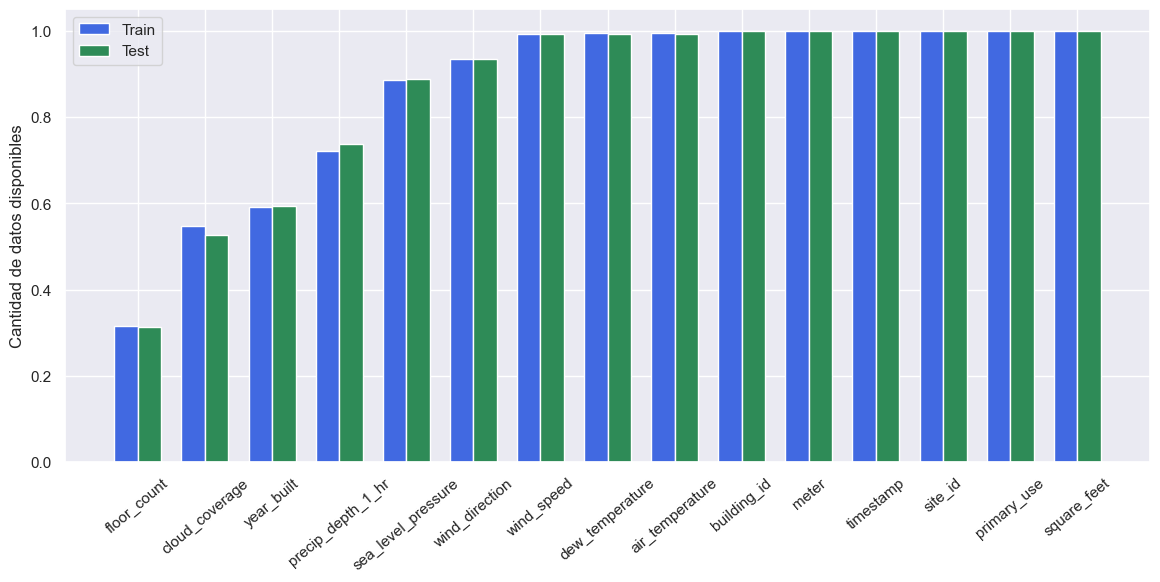

In [36]:
# variables en train y test

train_data = (train.count() / len(train)).drop('meter_reading').sort_values().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = (test.count() / len(test)).drop('row_id').sort_values().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Cantidad de datos disponibles');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.count() / len(train)).drop('meter_reading').sort_values().index, rotation=40)
axes.legend([tr, tt], ['Train', 'Test']);

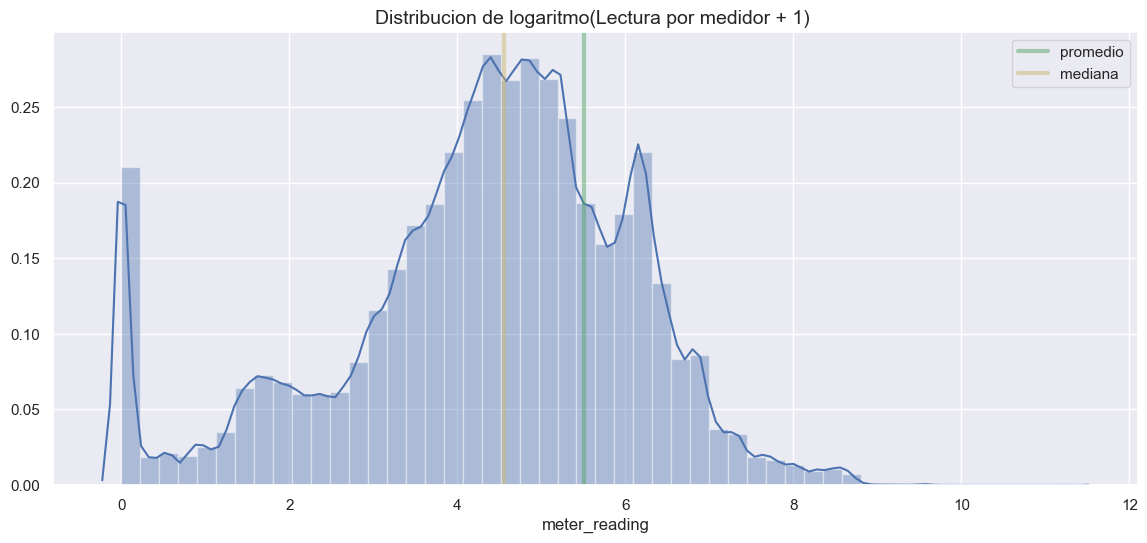

In [37]:
# para tener en cuenta las mediciones en 0
# set the plot size
#figsize(12,10)
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)

# set the histogram, mean and median
sns.distplot(np.log1p(train['meter_reading']),kde=True)
plt.axvline(x=np.log1p(train.meter_reading.mean()),linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=np.log1p(train.meter_reading.median()),linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribucion de logaritmo(Lectura por medidor + 1) ", size=14)
plt.legend(["promedio", "mediana"])

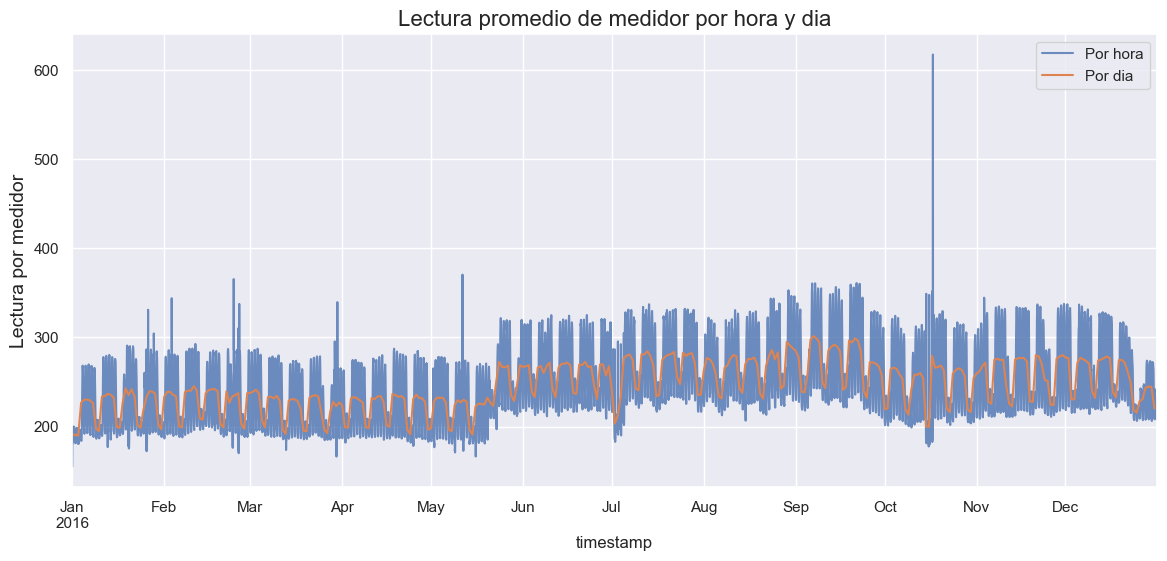

In [38]:
# Promedio de mediciones por dia y por hora

fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
train[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, label='Por hora', alpha=0.8).set_ylabel('Lectura por medidor', fontsize=14);
train[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes, label='Por dia', alpha=1).set_ylabel('Lectura por medidor', fontsize=14);
axes.set_title('Lectura promedio de medidor por hora y dia', fontsize=16);
axes.legend();

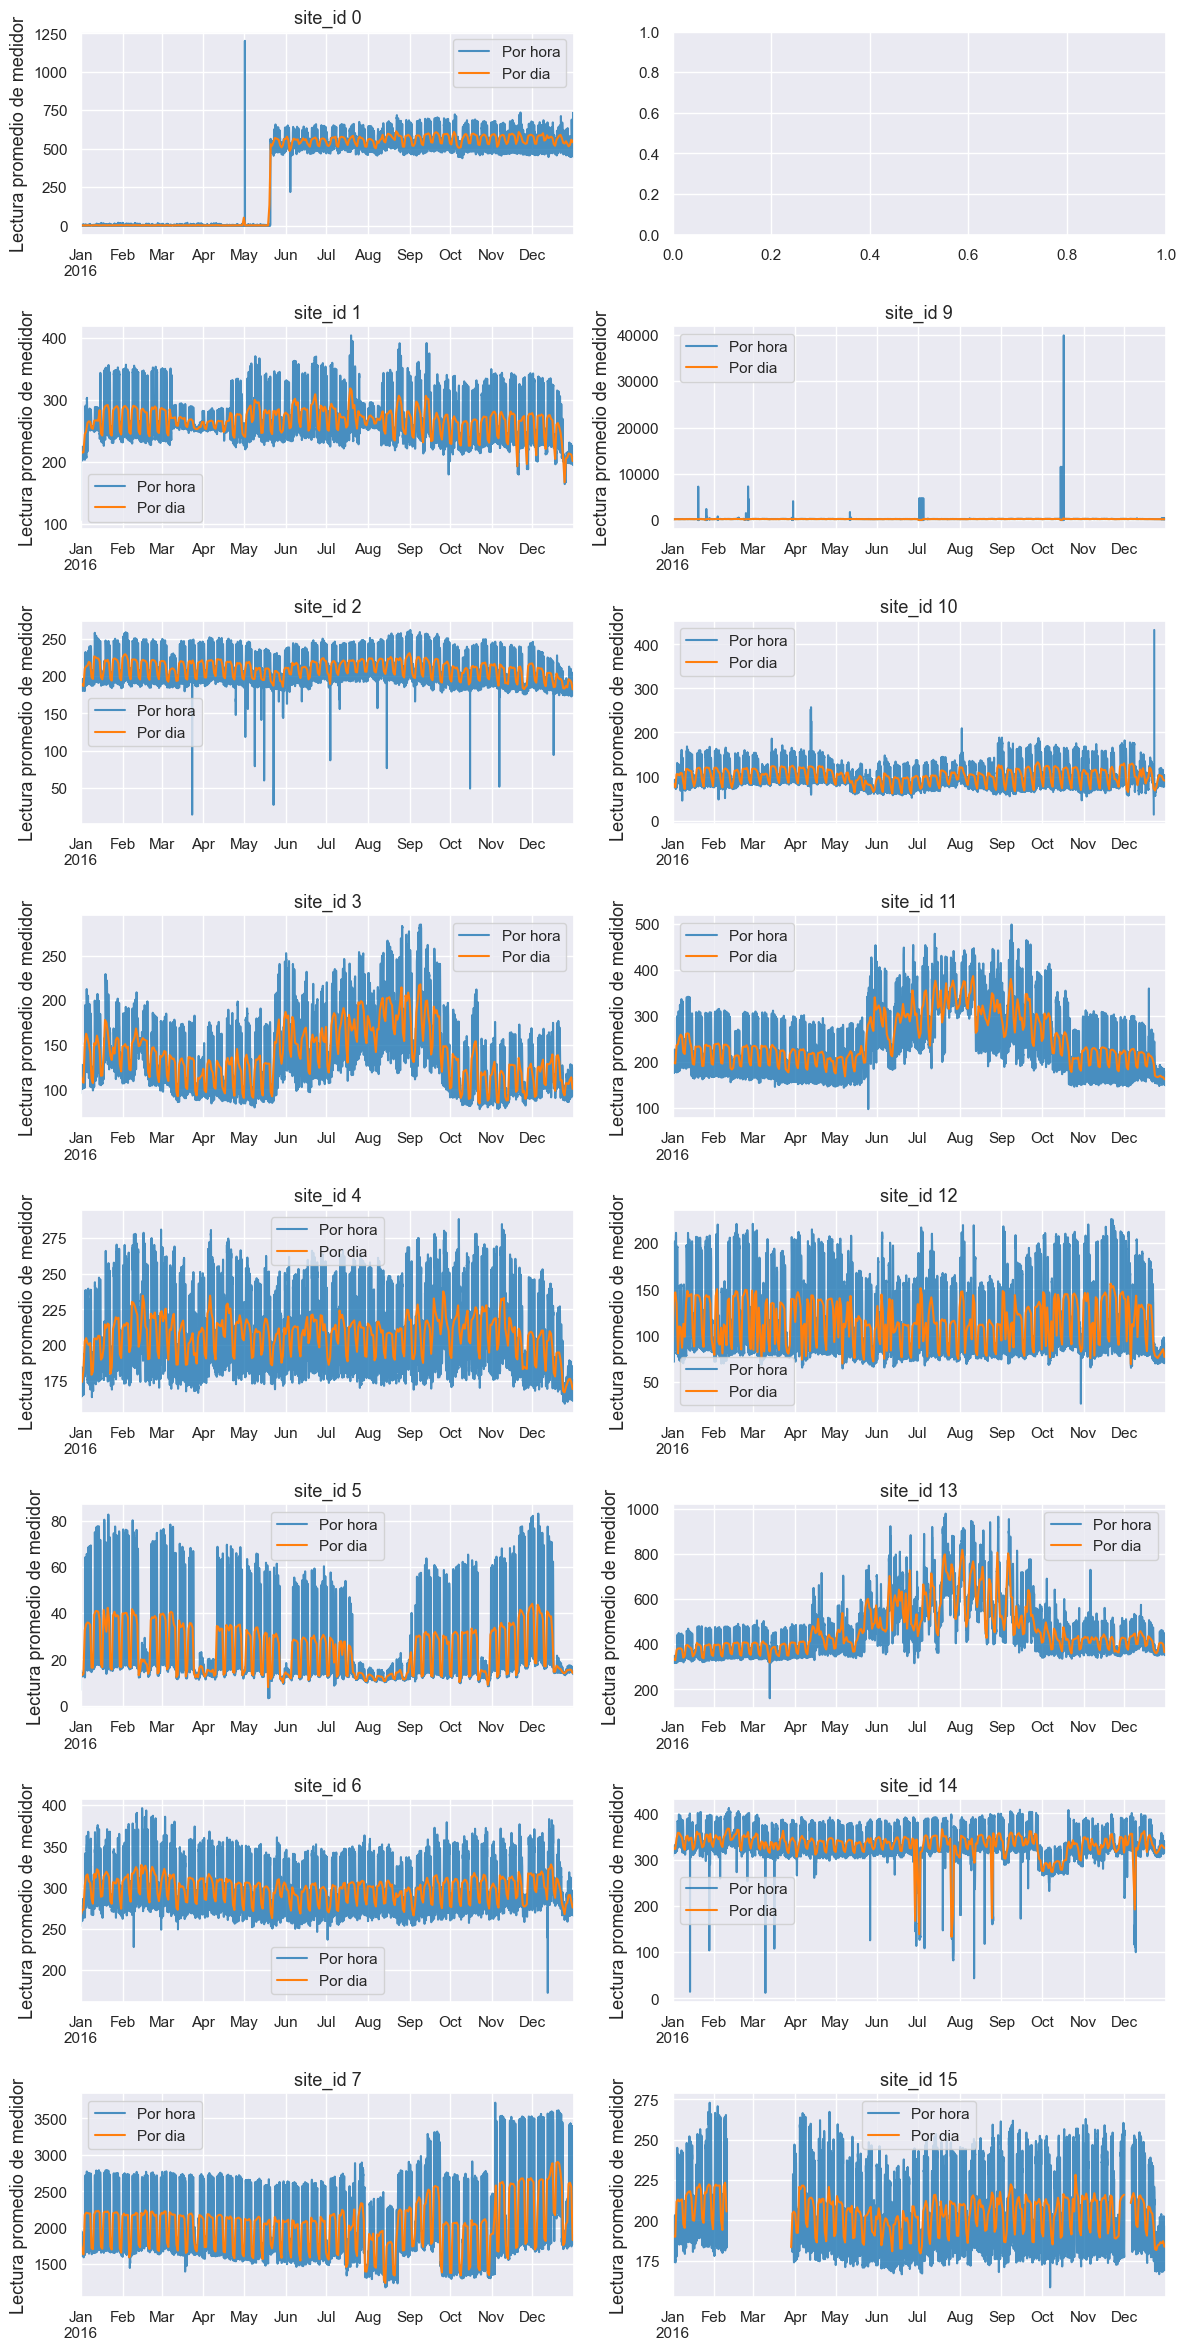

In [39]:
# Detalle de promedio mediciones por site id (dia y hora)

fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(16):
    if i == 8:
        continue
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='Por hora', color='tab:blue').set_ylabel('Lectura promedio de medidor', fontsize=13);
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='Por dia', color='tab:orange').set_xlabel('');
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

In [40]:
# correlaciones

train.corr()

building_id  meter  meter_reading   site_id  square_feet  \
building_id            1.000000    NaN       0.040118  0.967755     0.133484   
meter                       NaN    NaN            NaN       NaN          NaN   
meter_reading          0.040118    NaN       1.000000  0.051788     0.608265   
site_id                0.967755    NaN       0.051788  1.000000     0.135579   
square_feet            0.133484    NaN       0.608265  0.135579     1.000000   
year_built            -0.178791    NaN       0.152320 -0.111295     0.201893   
floor_count           -0.267073    NaN       0.393200 -0.216153     0.639202   
air_temperature       -0.274562    NaN      -0.034177 -0.244501    -0.022079   
cloud_coverage        -0.153105    NaN      -0.021298 -0.105718    -0.015288   
dew_temperature       -0.086624    NaN      -0.027263 -0.107716    -0.031292   
precip_depth_1_hr      0.023974    NaN       0.023401  0.027539     0.011860   
sea_level_pressure     0.044256    NaN      -0.011646  0.019962    -0.006283   
wind_direction         0.023285    NaN       0.002434  0.006980    -0.008169   
wind_speed            -0.011105    NaN      -0.035218 -0.023002    -0.054360   

                    year_built  floor_count  air_temperature  cloud_coverage  \
building_id          -0.178791    -0.267073        -0.274562       -0.153105   
meter                      NaN          NaN              NaN             NaN   
meter_reading         0.152320     0.393200        -0.034177       -0.021298   
site_id              -0.111295    -0.216153        -0.244501       -0.105718   
square_feet           0.201893     0.639202        -0.022079       -0.015288   
year_built            1.000000     0.215312         0.119436       -0.002636   
floor_count           0.215312     1.000000         0.032572        0.102063   
air_temperature       0.119436     0.032572         1.000000        0.012294   
cloud_coverage       -0.002636     0.102063         0.012294        1.000000   
dew_temperature       0.068273    -0.003887         0.706214        0.133273   
precip_depth_1_hr     0.016632     0.049328        -0.015299        0.131311   
sea_level_pressure   -0.027416     0.000249        -0.302747       -0.130113   
wind_direction       -0.051248     0.023241        -0.067959        0.061648   
wind_speed           -0.043683    -0.086793        -0.076888        0.256035   

                    dew_temperature  precip_depth_1_hr  sea_level_pressure  \
building_id               -0.086624           0.023974            0.044256   
meter                           NaN                NaN                 NaN   
meter_reading             -0.027263           0.023401           -0.011646   
site_id                   -0.107716           0.027539            0.019962   
square_feet               -0.031292           0.011860           -0.006283   
year_built                 0.068273           0.016632           -0.027416   
floor_count               -0.003887           0.049328            0.000249   
air_temperature            0.706214          -0.015299           -0.302747   
cloud_coverage             0.133273           0.131311           -0.130113   
dew_temperature            1.000000           0.064115           -0.196749   
precip_depth_1_hr          0.064115           1.000000           -0.062291   
sea_level_pressure        -0.196749          -0.062291            1.000000   
wind_direction            -0.131008          -0.013038           -0.106344   
wind_speed                -0.110507           0.031367           -0.212967   

                    wind_direction  wind_speed  
building_id               0.023285   -0.011105  
meter                          NaN         NaN  
meter_reading             0.002434   -0.035218  
site_id                   0.006980   -0.023002  
square_feet              -0.008169   -0.054360  
year_built               -0.051248   -0.043683  
floor_count               0.023241   -0.086793  
air_temperature          -0.067959   -0.076888  
cloud_

<a id="section_medidor"></a> 
## Por Medidor
[volver a TOC](#section_toc)

El código de identificación del medidor. Leer como {0: electricidad, 1: agua enfriada, 2: vapor, agua caliente: 3}. No todos los edificios tienen todos los tipos de medidores

Parece que el vapor es la forma más ineficaz de calentar las cosas.

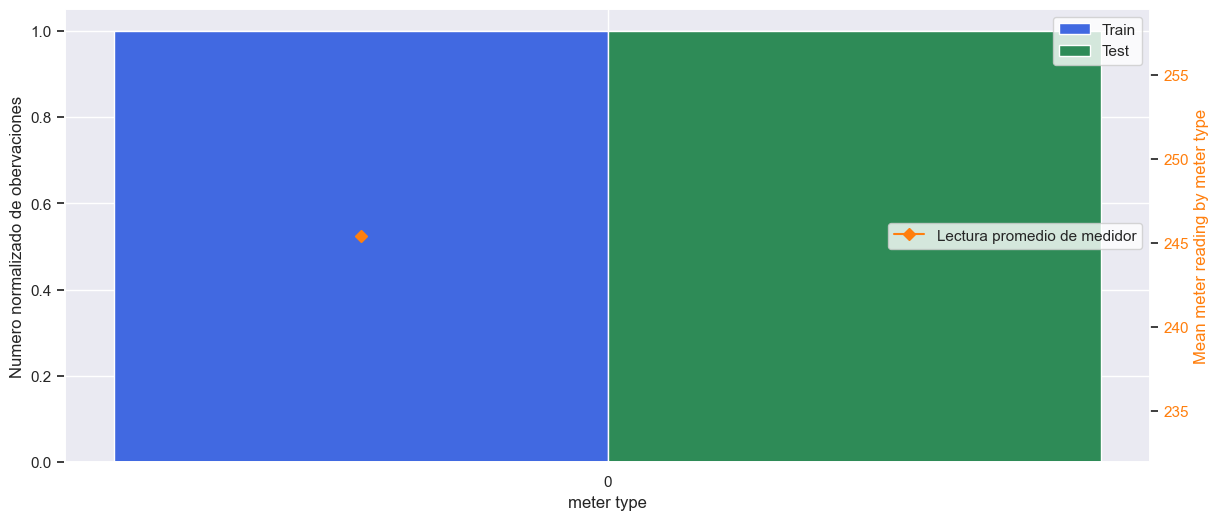

In [41]:
train_data = train['meter'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = test['meter'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Numero normalizado de obervaciones');
axes.set_xlabel('meter type');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train['meter'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train[['meter', 'meter_reading']].groupby('meter')['meter_reading'].mean().sort_index().values, 'D-', color='tab:orange', label='Lectura promedio de medidor');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Mean meter reading by meter type', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=5, facecolor='white');

### Boxplot de lectura de medidor por tipo de medidor con outliers removidos

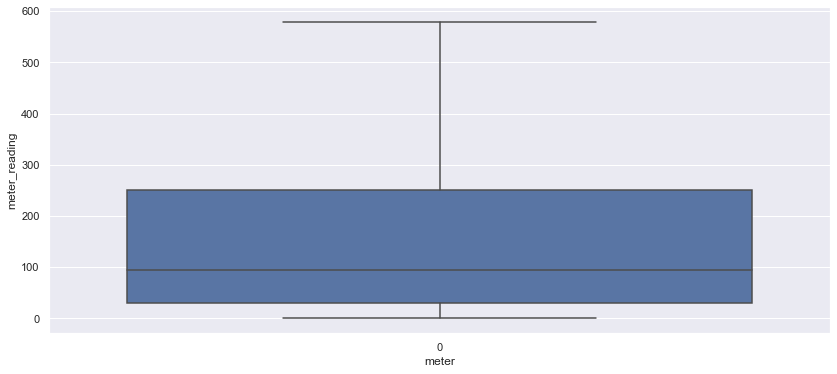

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='meter', y='meter_reading', data=train, showfliers=False);

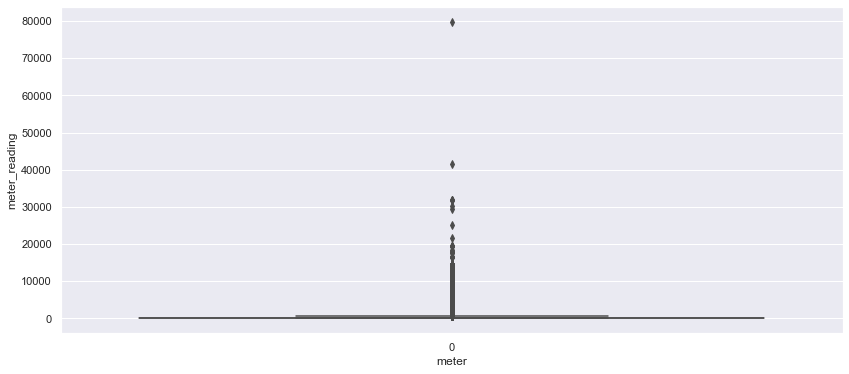

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='meter', y='meter_reading', data=train, showfliers=True);

### Boxplot de temperatura de aire por tipo de medidor

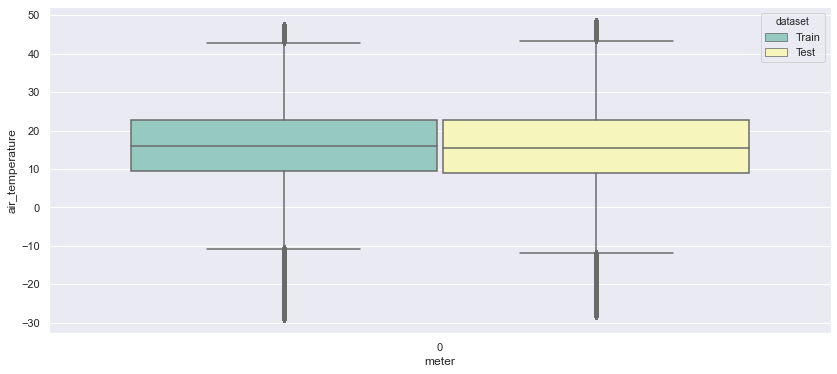

In [44]:
tmp_df = pd.concat([train[['meter', 'air_temperature']], test[['meter', 'air_temperature']]], ignore_index=True)
tmp_df['dataset'] = 'Train'
tmp_df.loc[tmp_df.index > len(train), 'dataset'] = 'Test'

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='meter', y='air_temperature', data=tmp_df, hue='dataset', palette="Set3");

del tmp_df
gc.collect();

<a id="section_site"></a> 
## Por site_id
[volver a TOC](#section_toc)

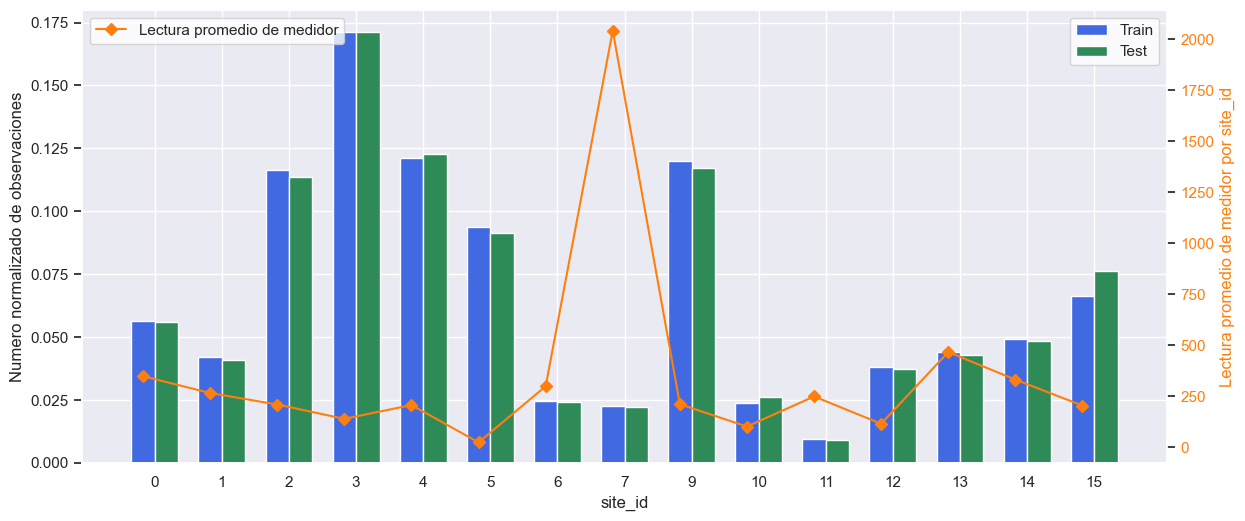

In [45]:
train_data = train['site_id'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = test['site_id'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Numero normalizado de observaciones');
axes.set_xlabel('site_id');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train['site_id'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train[['site_id', 'meter_reading']].groupby('site_id')['meter_reading'].mean().sort_index().values, 'D-', color='tab:orange', label='Lectura promedio de medidor');axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Lectura promedio de medidor por site_id', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

### Boxplot de lecturas de medidor por site_id con outliers removidos

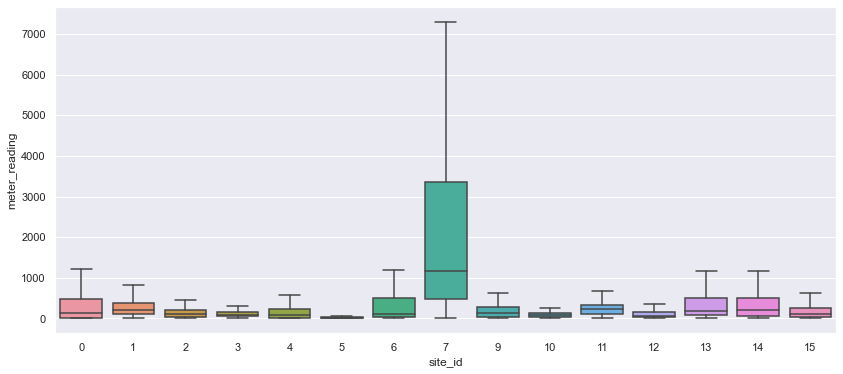

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='site_id', y='meter_reading', data=train, showfliers=False);

### Boxplot de temperatura de aire por site_id

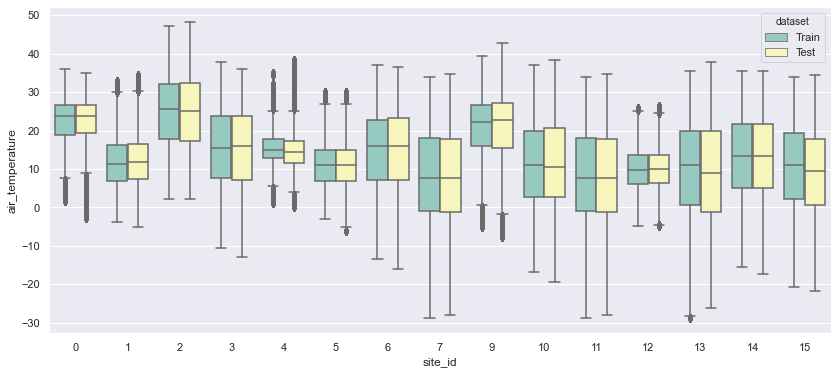

In [47]:
tmp_df = pd.concat([train[['site_id', 'air_temperature']], test[['site_id', 'air_temperature']]], ignore_index=True)
tmp_df['dataset'] = 'Train'
tmp_df.loc[tmp_df.index > len(train), 'dataset'] = 'Test'

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='site_id', y='air_temperature', data=tmp_df, hue='dataset', palette="Set3");

del tmp_df
gc.collect();

### Area de edificio en pies cuadrados

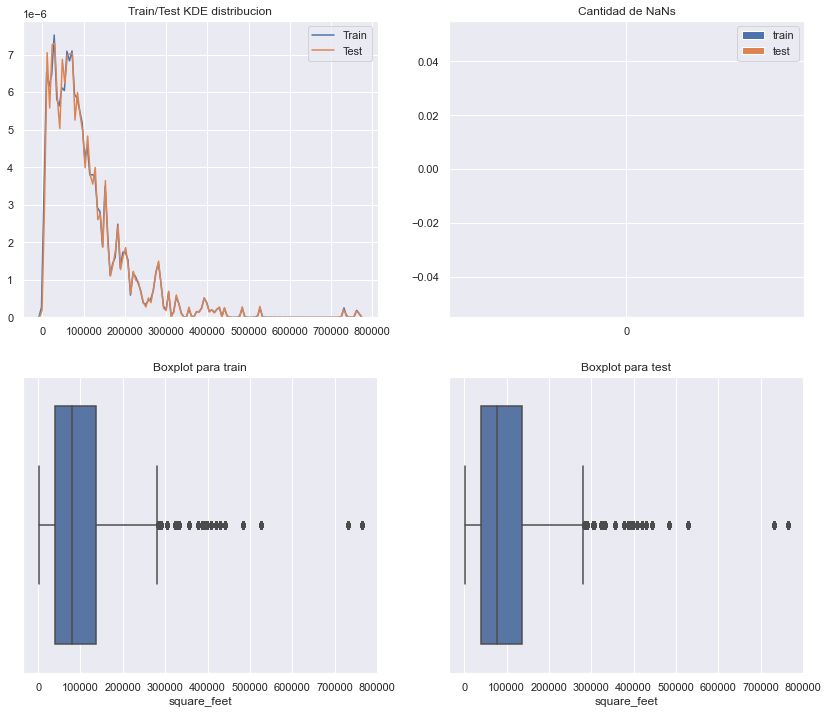

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.kdeplot(train['square_feet'], ax=axes[0][0], label='Train');
sns.kdeplot(test['square_feet'], ax=axes[0][0], label='Test');
sns.boxplot(x=train['square_feet'], ax=axes[1][0]);
sns.boxplot(x=test['square_feet'], ax=axes[1][1]);
pd.DataFrame({'train': [train['square_feet'].isnull().sum()], 'test': [test['square_feet'].isnull().sum()]}).plot(kind='bar', rot=0, ax=axes[0][1]);
axes[0][0].legend();
axes[0][0].set_title('Train/Test KDE distribucion');
axes[0][1].set_title('Cantidad de NaNs');
axes[1][0].set_title('Boxplot para train');
axes[1][1].set_title('Boxplot para test');
gc.collect();

### Promedio de lectura de medidor por building_id

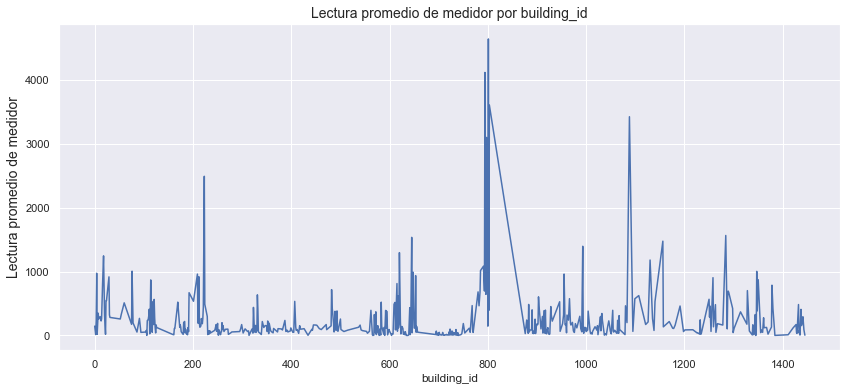

In [49]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train.groupby('building_id')['meter_reading'].mean().plot();
axes.set_title('Lectura promedio de medidor por building_id', fontsize=14);
axes.set_ylabel('Lectura promedio de medidor', fontsize=14);

### El building_ip 1099 tiene un consumo de vapor enorme. en la electrica no se da cuenta

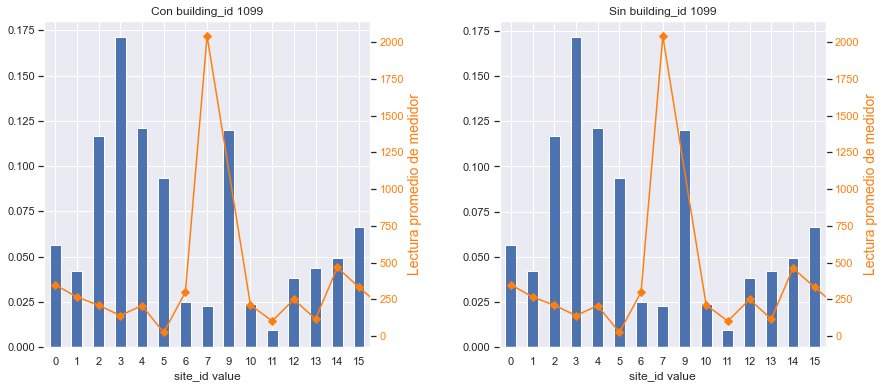

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
train['site_id'].value_counts(dropna=False, normalize=True).sort_index().plot(kind='bar', rot=0, ax=axes[0]).set_xlabel('site_id value');
train[train['building_id']!=1099]['site_id'].value_counts(dropna=False, normalize=True).sort_index().plot(kind='bar', rot=0, ax=axes[1]).set_xlabel('site_id value');
ax2 = axes[0].twinx()
ax3 = axes[1].twinx()
train.groupby('site_id')['meter_reading'].mean().sort_index().plot(ax=ax2, style='D-', grid=False, color='tab:orange');
train[train['building_id']!=1099].groupby('site_id')['meter_reading'].mean().sort_index().plot(ax=ax3, style='D-', grid=False, color='tab:orange');
ax2.set_ylabel('Lectura promedio de medidor', color='tab:orange', fontsize=14);
ax3.set_ylabel('Lectura promedio de medidor', color='tab:orange', fontsize=14);
ax2.tick_params(axis='y', labelcolor='tab:orange');
ax3.tick_params(axis='y', labelcolor='tab:orange');
plt.subplots_adjust(wspace=0.4)
axes[0].set_title('Con building_id 1099');
axes[1].set_title('Sin building_id 1099');

### Año de construccion

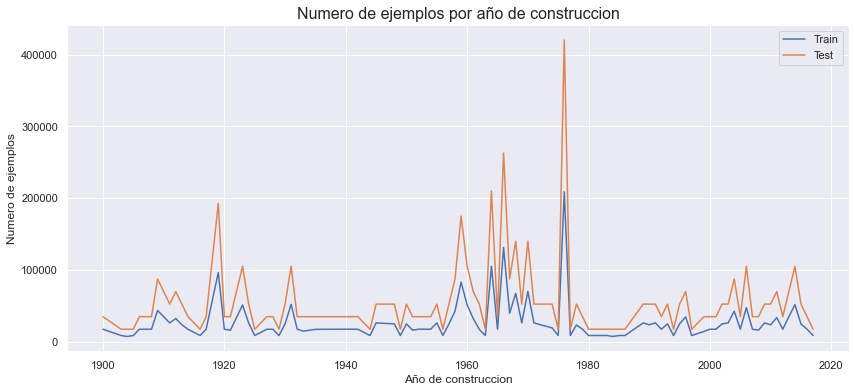

In [51]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train['year_built'].value_counts(dropna=False).sort_index().plot(ax=axes).set_xlabel('Año de construccion');
test['year_built'].value_counts(dropna=False).sort_index().plot(ax=axes).set_ylabel('Numero de ejemplos');
axes.legend(['Train', 'Test']);
axes.set_title('Numero de ejemplos por año de construccion', fontsize=16);

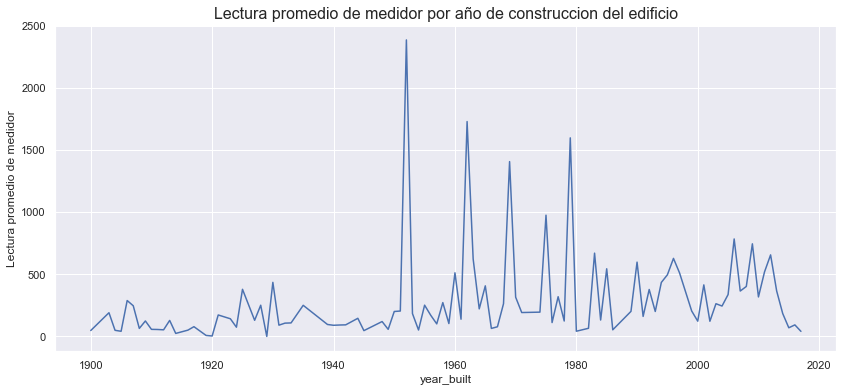

In [52]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train.groupby('year_built')['meter_reading'].mean().plot().set_ylabel('Lectura promedio de medidor');
axes.set_title('Lectura promedio de medidor por año de construccion del edificio', fontsize=16);

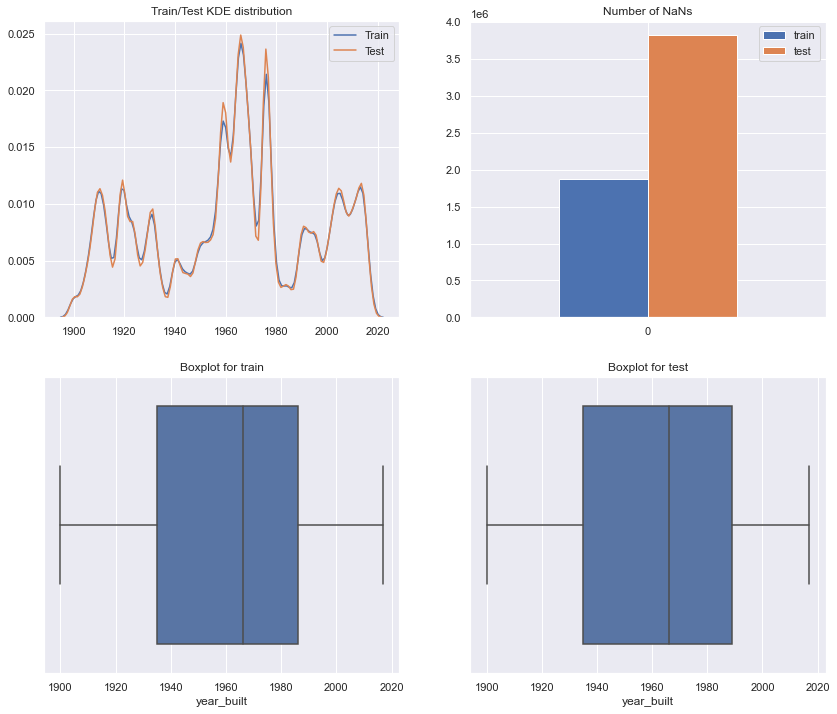

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.kdeplot(train['year_built'], ax=axes[0][0], label='Train');
sns.kdeplot(test['year_built'], ax=axes[0][0], label='Test');
sns.boxplot(x=train['year_built'], ax=axes[1][0]);
sns.boxplot(x=test['year_built'], ax=axes[1][1]);
pd.DataFrame({'train': [train['year_built'].isnull().sum()], 'test': [test['year_built'].isnull().sum()]}).plot(kind='bar', rot=0, ax=axes[0][1]);
axes[0][0].legend();
axes[0][0].set_title('Train/Test KDE distribution');
axes[0][1].set_title('Number of NaNs');
axes[1][0].set_title('Boxplot for train');
axes[1][1].set_title('Boxplot for test');
gc.collect();

### Numero de pisos de los edificios

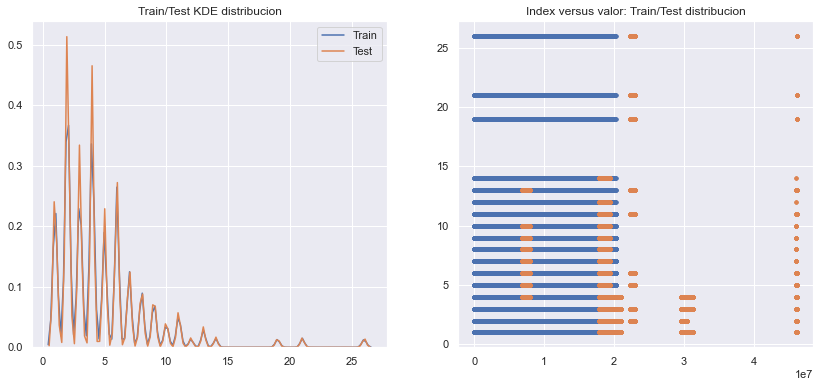

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(train['floor_count'], label='Train', ax=axes[0]);
sns.kdeplot(test['floor_count'], label='Test', ax=axes[0]);
test.index += len(train)
axes[1].plot(train['floor_count'], '.', label='Train');
axes[1].plot(test['floor_count'], '.', label='Test');
test.index -= len(train)
axes[0].set_title('Train/Test KDE distribucion');
axes[1].set_title('Index versus valor: Train/Test distribucion');
gc.collect();

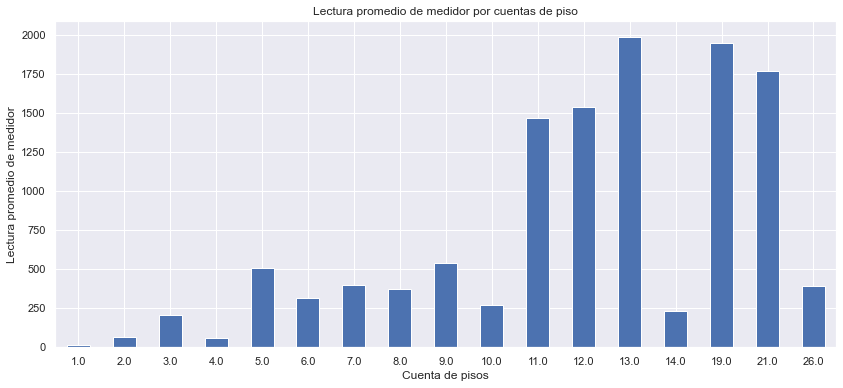

In [55]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
pd.Series(index=train['floor_count'].value_counts().index, 
          data=train.groupby('floor_count')['meter_reading'].transform('mean').value_counts().index).sort_index().plot(kind='bar', rot=0, ax=axes);
axes.set_xlabel('Cuenta de pisos');
axes.set_ylabel('Lectura promedio de medidor');
axes.set_title('Lectura promedio de medidor por cuentas de piso');

### Cuenta de NaN en los pisos

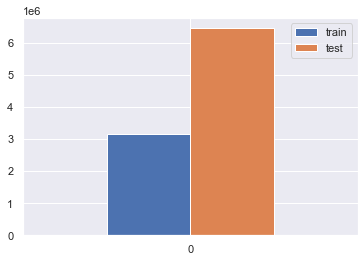

In [56]:
pd.DataFrame({'train': [train['floor_count'].isnull().sum()], 'test': [test['floor_count'].isnull().sum()]}).plot(kind='bar', rot=0);

<a id="section_temperatura"></a> 
## Por Temperatura
[volver a TOC](#section_toc)

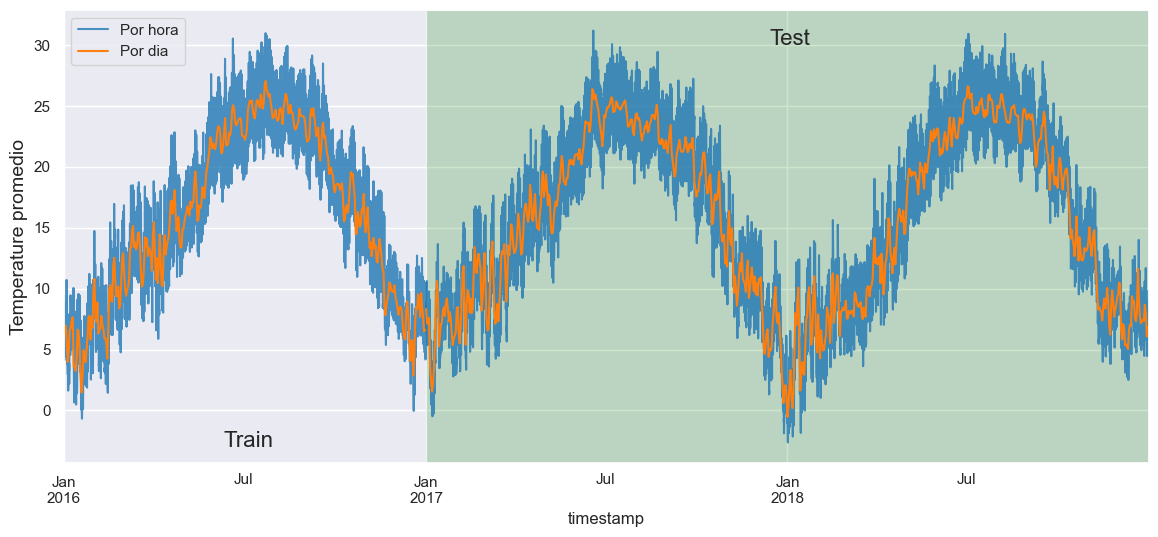

In [57]:
fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes, alpha=0.8, label='Por hora', color='tab:blue').set_ylabel('Temperature promedio', fontsize=14);
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes, alpha=0.8, color='tab:blue', label='');
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, label='Por dia', color='tab:orange');
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, color='tab:orange', label='');
axes.legend();
axes.text(train['timestamp'].iloc[2000000], -3, 'Train', fontsize=16);
axes.text(test['timestamp'].iloc[2740000], 30, 'Test', fontsize=16);
axes.axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);

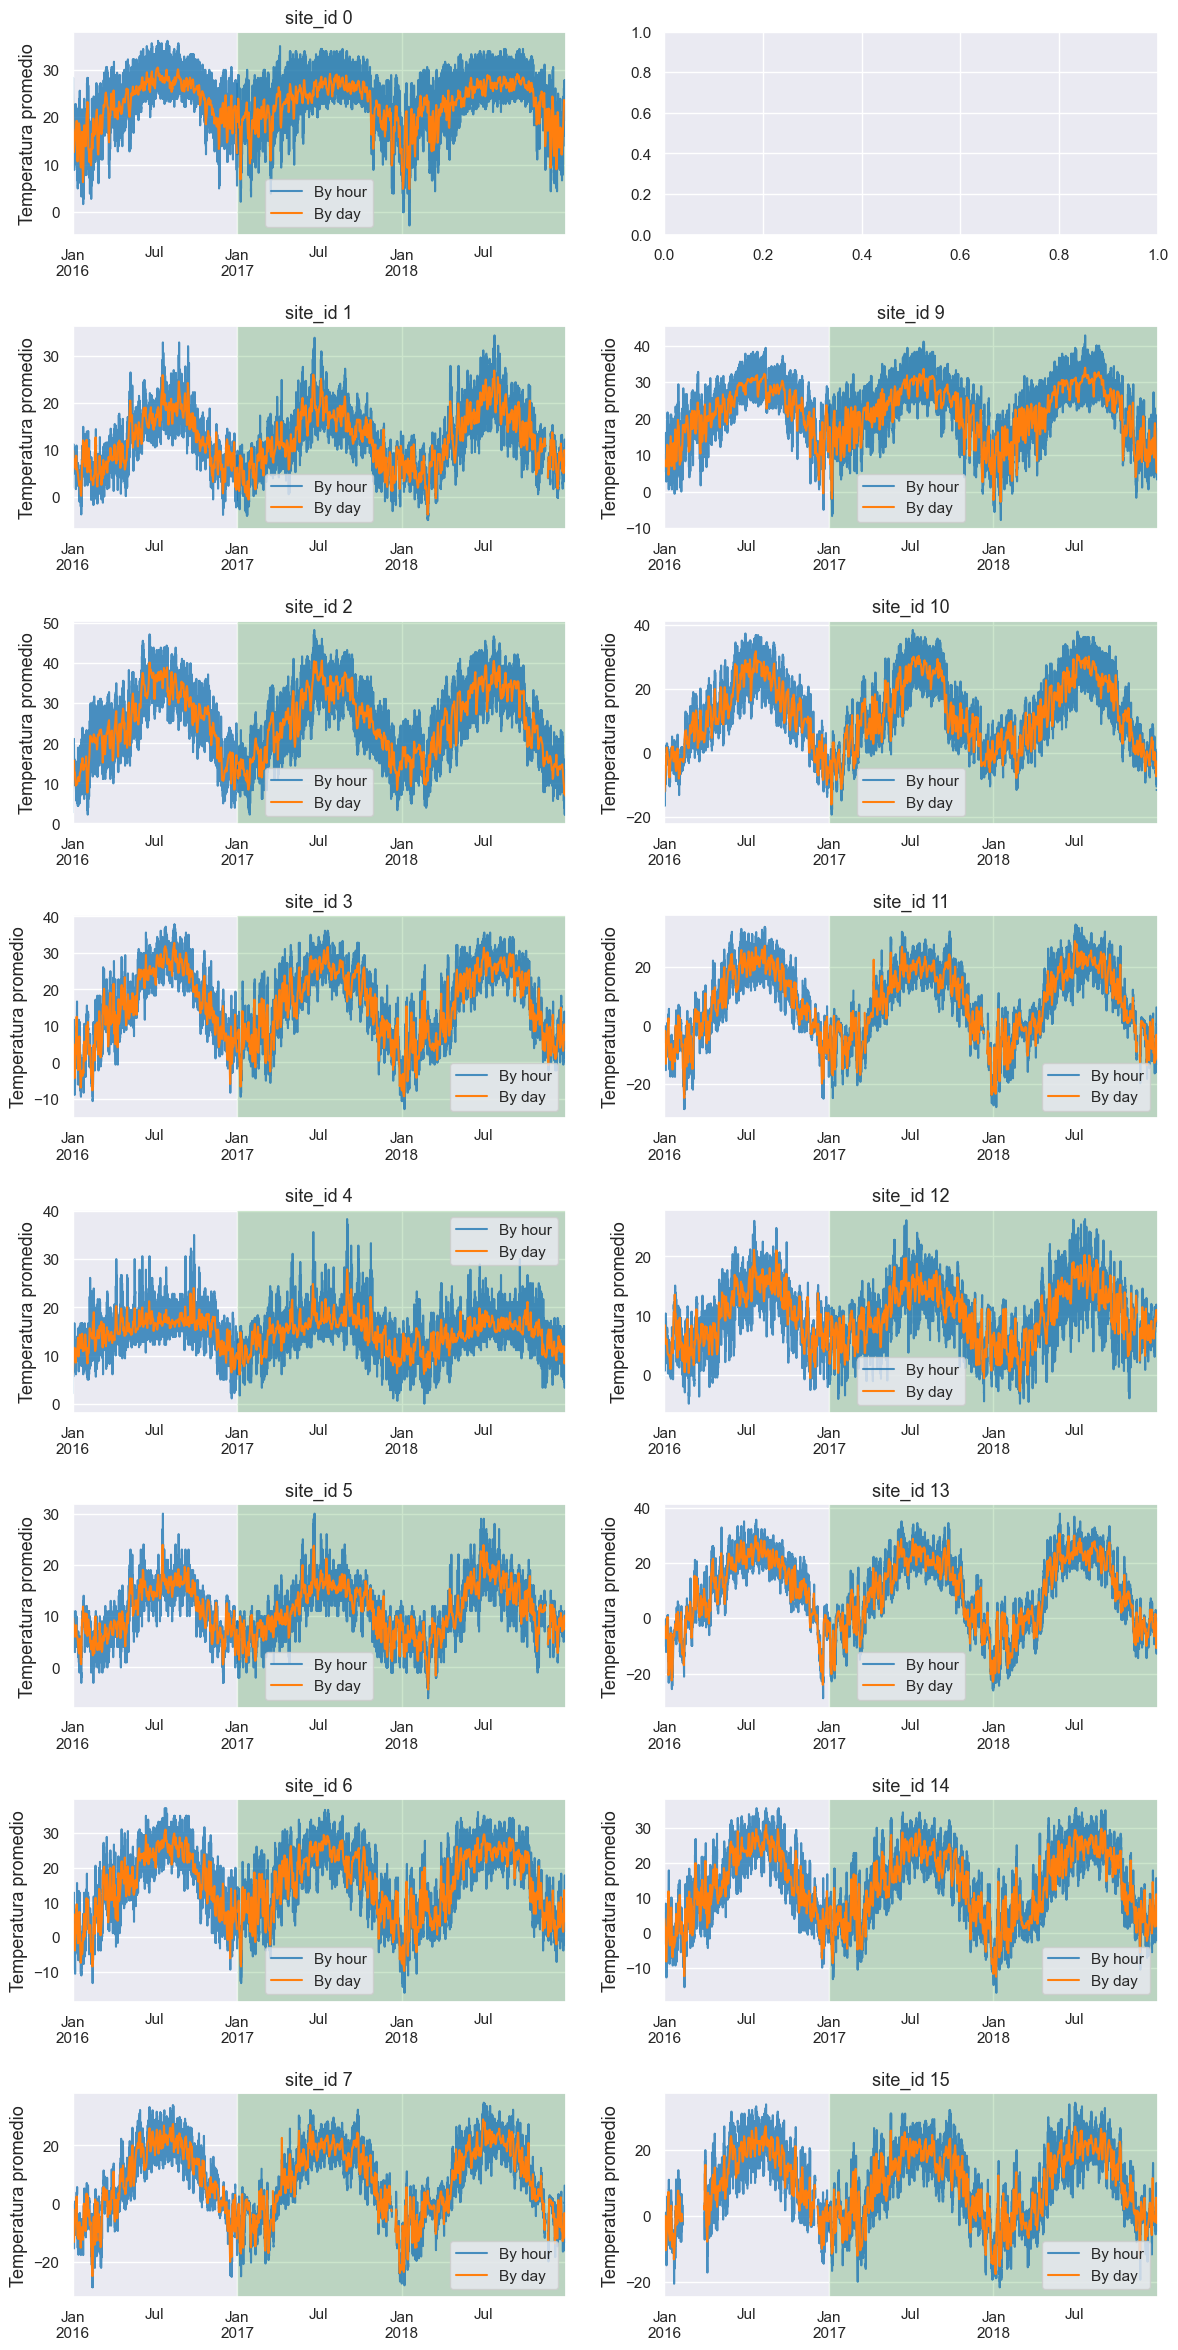

In [58]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(16):
    if i == 8:
        continue
    
    train[train['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Temperatura promedio', fontsize=13);
    test[test['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, color='tab:blue', label='').set_xlabel('')
    train[train['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange')
    test[test['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=1, color='tab:orange', label='').set_xlabel('')
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    axes[i%8][i//8].axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);
    plt.subplots_adjust(hspace=0.45)

### Porcentaje de cielo cubierto medido en oktas (cloud coverage)

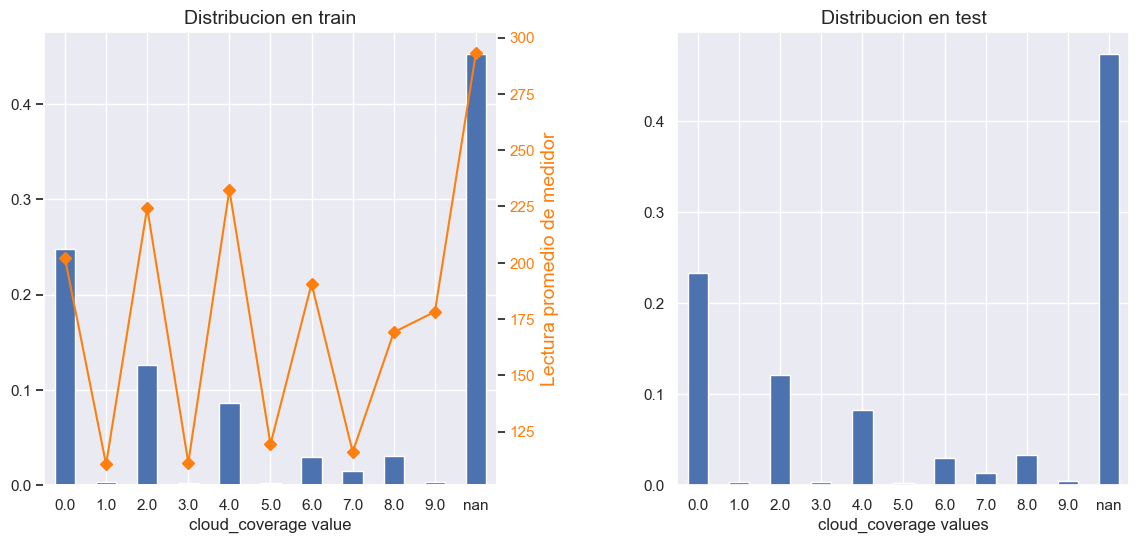

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
train['cloud_coverage'].value_counts(dropna=False, normalize=True).sort_index().plot(kind='bar', rot=0, ax=axes[0]).set_xlabel('cloud_coverage value');
test['cloud_coverage'].value_counts(dropna=False, normalize=True).sort_index().plot(kind='bar', rot=0, ax=axes[1]).set_xlabel('cloud_coverage values');
axes[0].set_title('Distribucion en train', fontsize=14);
axes[1].set_title('Distribucion en test', fontsize=14);
ax2 = axes[0].twinx()
train[['cloud_coverage', 'meter_reading']].replace(np.nan, 'nan').groupby('cloud_coverage')['meter_reading'].mean().plot(ax=ax2, style='D-', grid=False, color='tab:orange');
ax2.tick_params(axis='y', labelcolor='tab:orange');
ax2.set_ylabel('Lectura promedio de medidor', color='tab:orange', fontsize=14);
ax2.set_xticklabels(train['cloud_coverage'].value_counts(dropna=False).sort_index().index)
plt.subplots_adjust(wspace=0.4);

### Punto de rocio

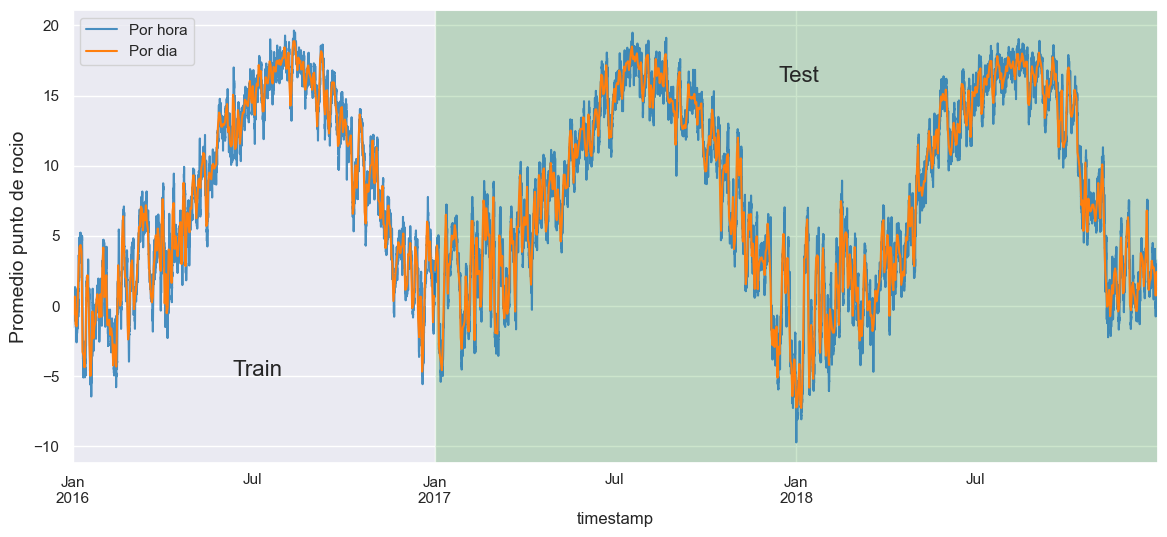

In [60]:
fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'dew_temperature']].set_index('timestamp').resample('H').mean()['dew_temperature'].plot(ax=axes, alpha=0.8, label='Por hora', color='tab:blue').set_ylabel('Promedio punto de rocio', fontsize=14);
test[['timestamp', 'dew_temperature']].set_index('timestamp').resample('H').mean()['dew_temperature'].plot(ax=axes, alpha=0.8, color='tab:blue', label='');
train[['timestamp', 'dew_temperature']].set_index('timestamp').resample('D').mean()['dew_temperature'].plot(ax=axes, alpha=1, label='Por dia', color='tab:orange');
test[['timestamp', 'dew_temperature']].set_index('timestamp').resample('D').mean()['dew_temperature'].plot(ax=axes, alpha=1, color='tab:orange', label='');
axes.legend();
axes.text(train['timestamp'].iloc[2000000], -5, 'Train', fontsize=16);
axes.text(test['timestamp'].iloc[2740000], 16, 'Test', fontsize=16);
axes.axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);

### Promedio punto de rocio por site_id

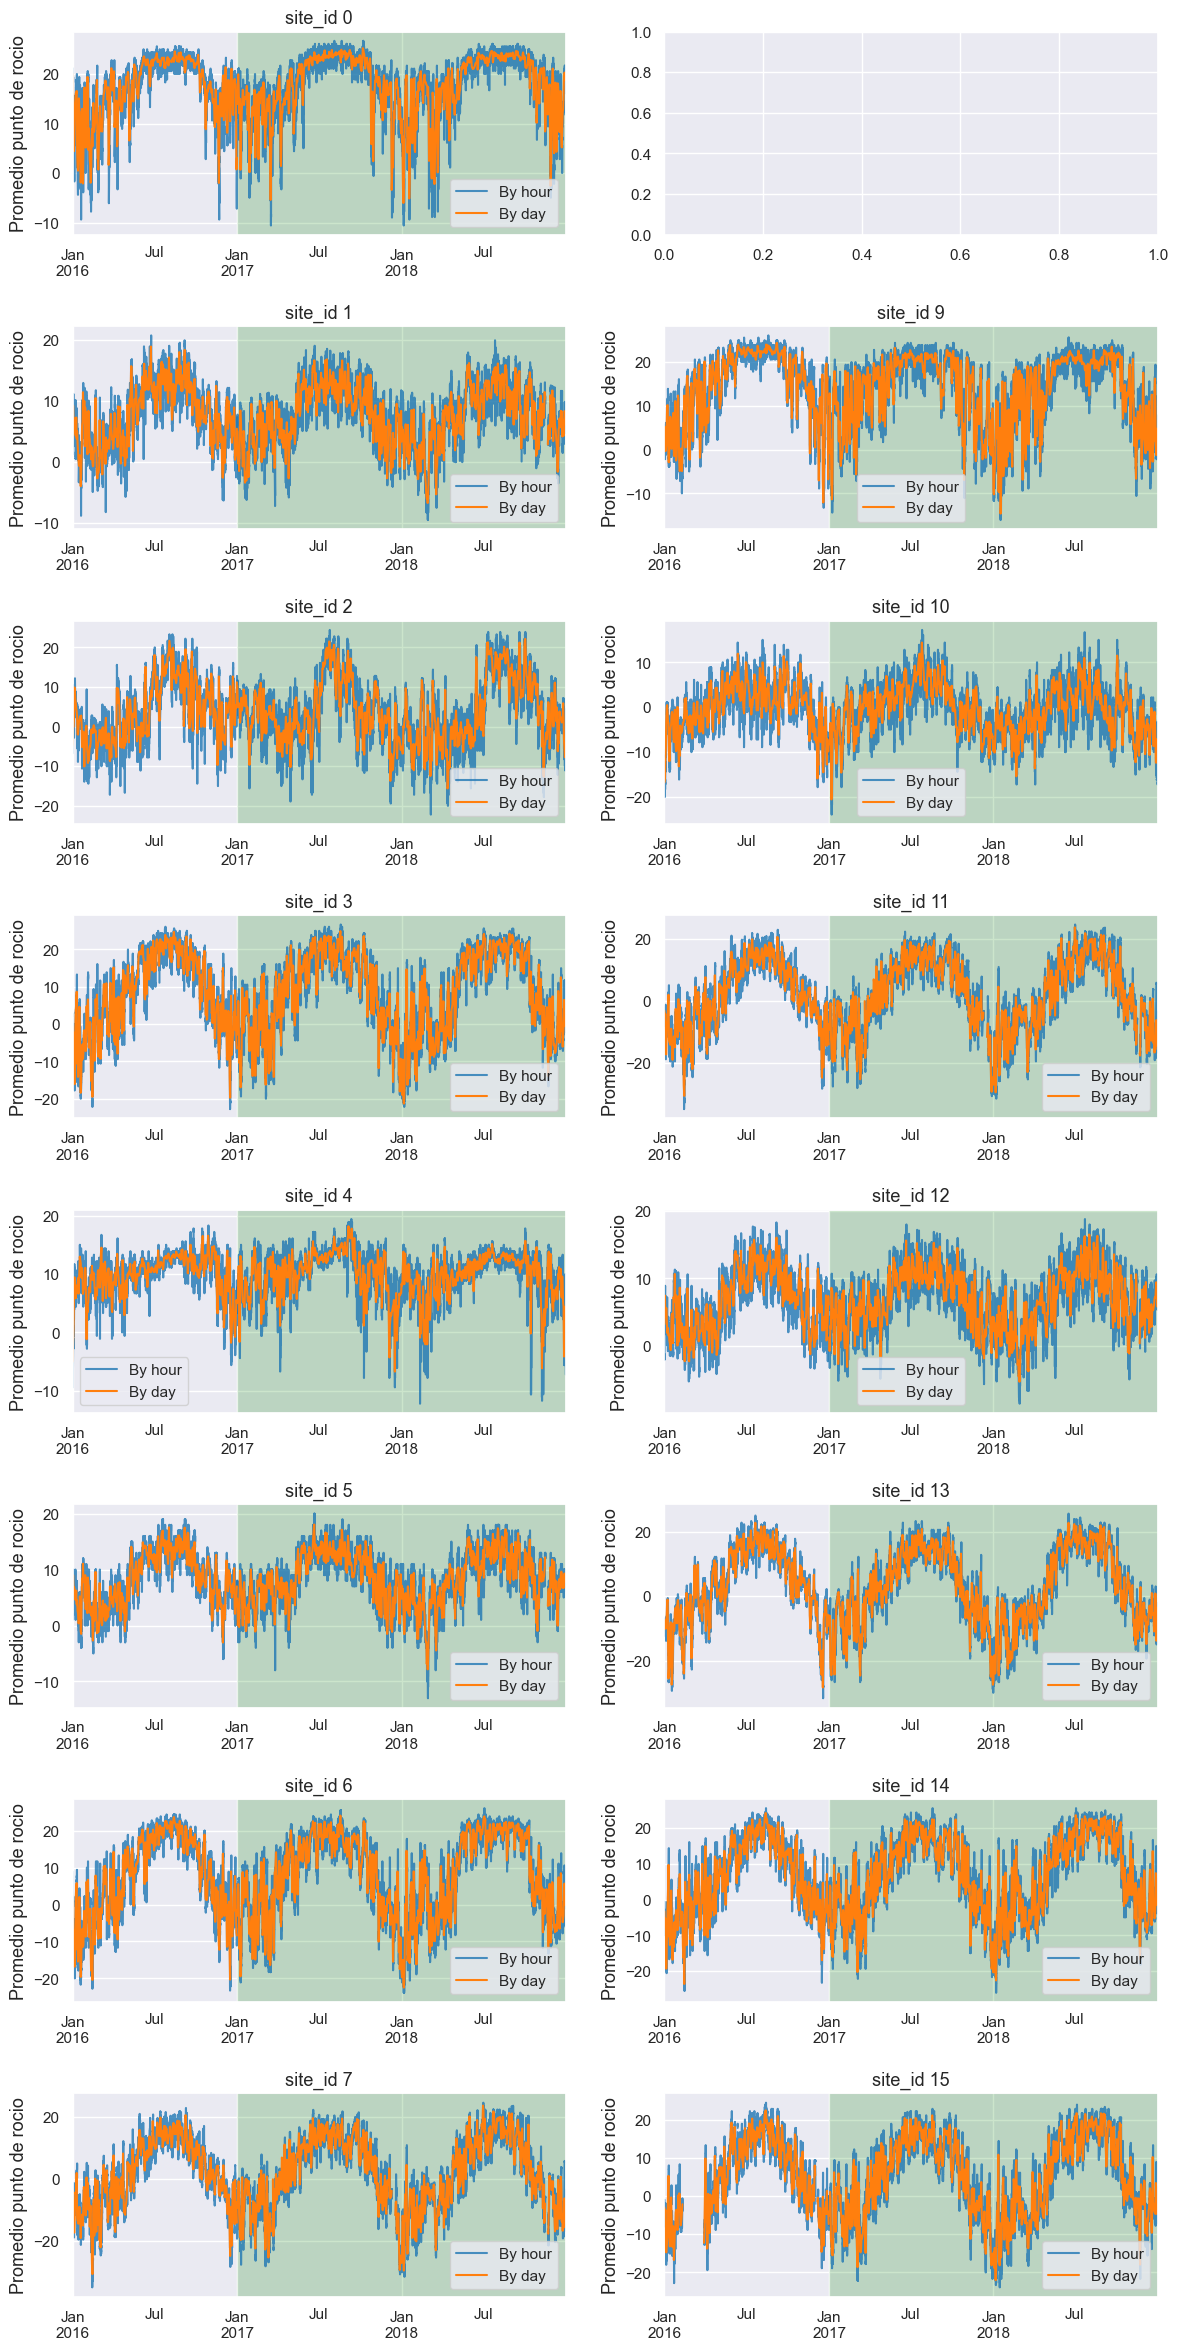

In [61]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(16):
    if i == 8:
        continue
    
    train[train['site_id'] == i][['timestamp', 'dew_temperature']].set_index('timestamp').resample('H').mean()['dew_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Promedio punto de rocio', fontsize=13);
    test[test['site_id'] == i][['timestamp', 'dew_temperature']].set_index('timestamp').resample('H').mean()['dew_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, color='tab:blue', label='').set_xlabel('')
    train[train['site_id'] == i][['timestamp', 'dew_temperature']].set_index('timestamp').resample('D').mean()['dew_temperature'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange')
    test[test['site_id'] == i][['timestamp', 'dew_temperature']].set_index('timestamp').resample('D').mean()['dew_temperature'].plot(ax=axes[i%8][i//8], alpha=1, color='tab:orange', label='').set_xlabel('')
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    axes[i%8][i//8].axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);
    plt.subplots_adjust(hspace=0.45)

## Precipitacion 1 hr

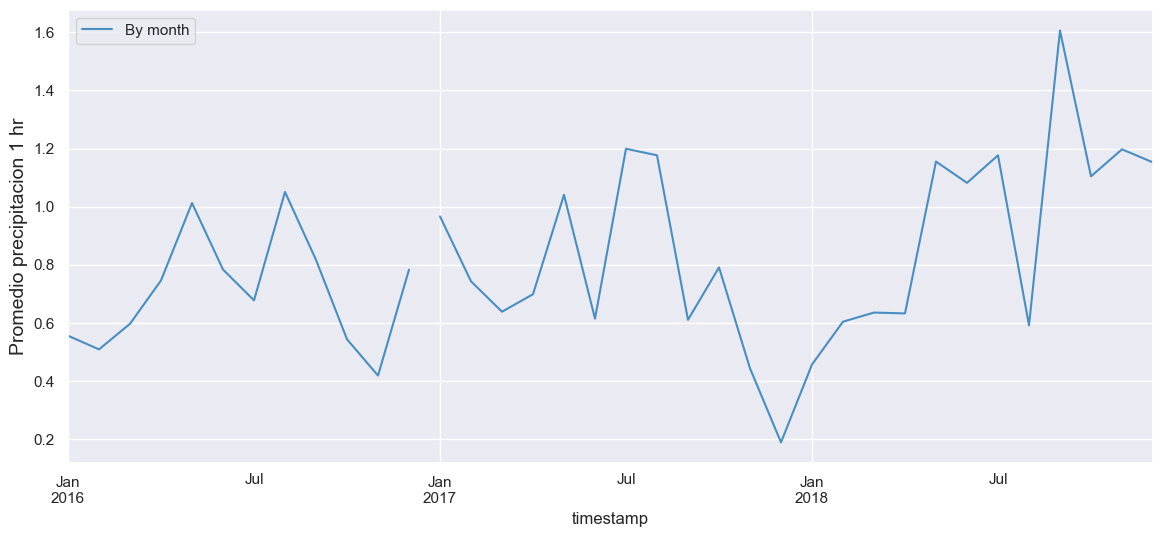

In [62]:
fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'precip_depth_1_hr']].set_index('timestamp').resample('M').mean()['precip_depth_1_hr'].plot(ax=axes, alpha=0.8, label='By month', color='tab:blue').set_ylabel('Promedio precipitacion 1 hr', fontsize=14);
test[['timestamp', 'precip_depth_1_hr']].set_index('timestamp').resample('M').mean()['precip_depth_1_hr'].plot(ax=axes, alpha=0.8, color='tab:blue', label='');
axes.legend();

## Presion del nivel del mar (Millibar/hectopascals)

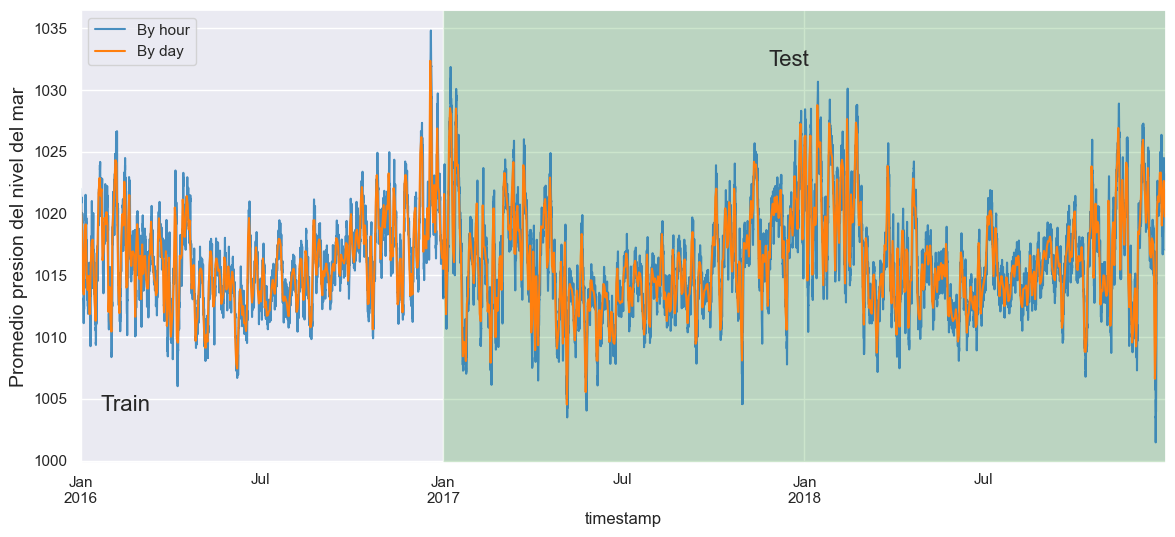

In [63]:
fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('H').mean()['sea_level_pressure'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Promedio presion del nivel del mar', fontsize=14);
test[['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('H').mean()['sea_level_pressure'].plot(ax=axes, alpha=0.8, color='tab:blue', label='');
train[['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('D').mean()['sea_level_pressure'].plot(ax=axes, alpha=1, label='By day', color='tab:orange');
test[['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('D').mean()['sea_level_pressure'].plot(ax=axes, alpha=1, color='tab:orange', label='');
axes.legend();
axes.text(train['timestamp'].iloc[250000], 1004, 'Train', fontsize=16);
axes.text(test['timestamp'].iloc[2700000], 1032, 'Test', fontsize=16);
axes.axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);

## Por site_id

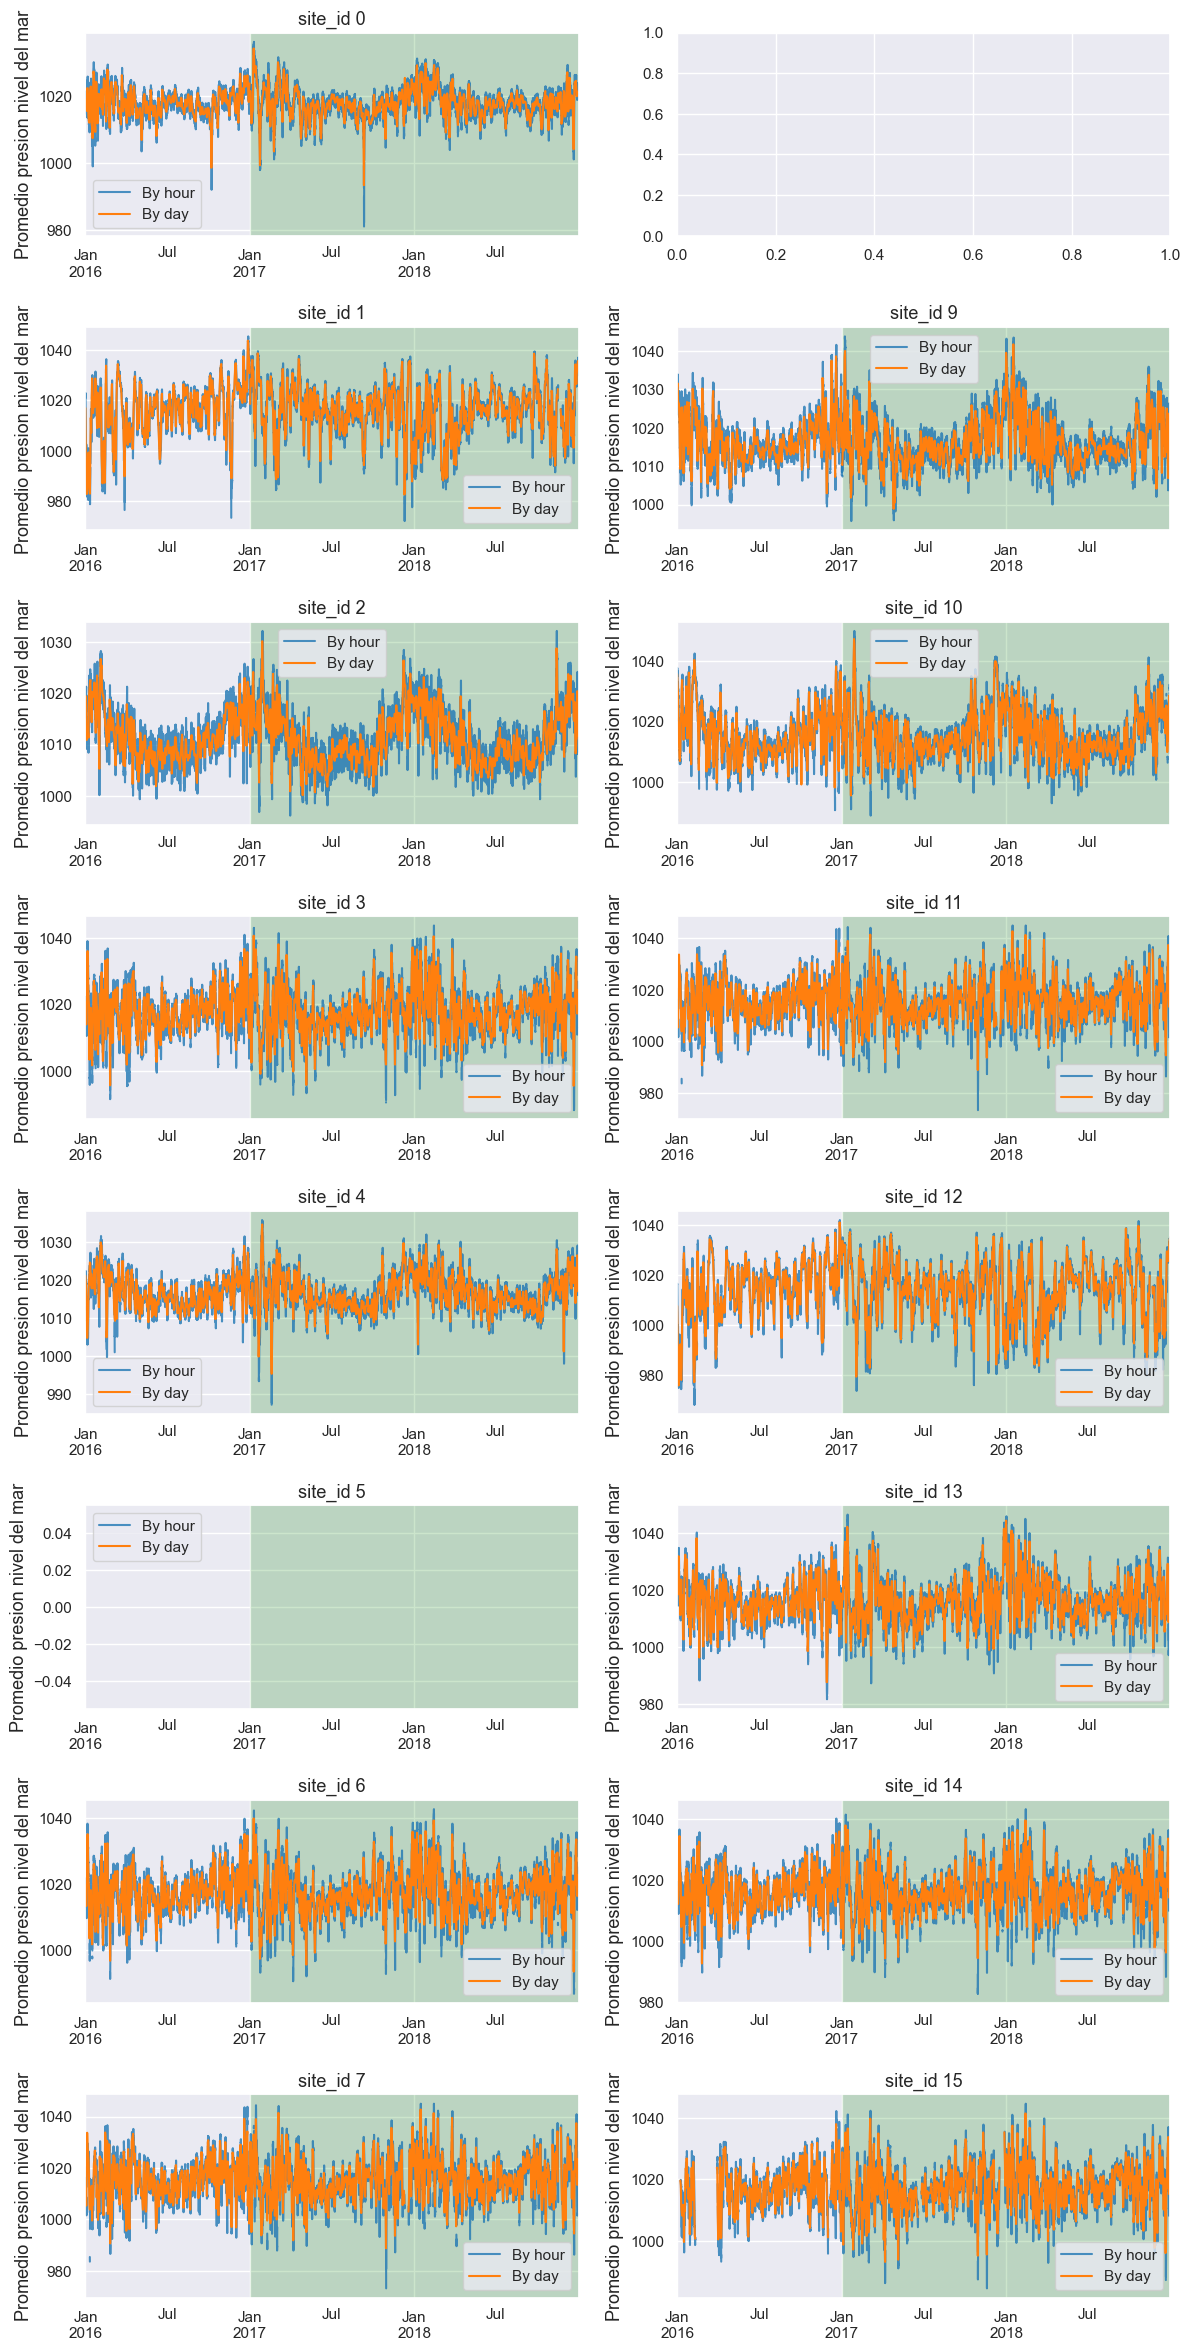

In [64]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(16):
    if i == 8:
        continue
    train[train['site_id'] == i][['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('H').mean()['sea_level_pressure'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Promedio presion nivel del mar', fontsize=13);
    test[test['site_id'] == i][['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('H').mean()['sea_level_pressure'].plot(ax=axes[i%8][i//8], alpha=0.8, color='tab:blue', label='').set_xlabel('')
    train[train['site_id'] == i][['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('D').mean()['sea_level_pressure'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange')
    test[test['site_id'] == i][['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('D').mean()['sea_level_pressure'].plot(ax=axes[i%8][i//8], alpha=1, color='tab:orange', label='').set_xlabel('')
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    axes[i%8][i//8].axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);
    plt.subplots_adjust(hspace=0.45)

## Direccion y velocidad del viento

In [65]:
print('Numero de observaciones con 0 grados de direccion en TRAIN: {} ({:.2f}%)'.format(train[train['wind_direction'] == 0].shape[0], train[train['wind_direction'] == 0].shape[0] / len(train)))
print('Numero de observaciones con 0 grados de direccion en TEST: {} ({:.2f}%)'.format(test[test['wind_direction'] == 0].shape[0], test[test['wind_direction'] == 0].shape[0] / len(test)))
print('Numero de observaciones con 360 grados de direccion en TRAIN: {} ({:.2f}%)'.format(train[train['wind_direction'] == 360].shape[0], train[train['wind_direction'] == 360].shape[0] / len(train)))
print('Numero de observaciones con 360 grados de direccion en TEST: {} ({:.2f}%)'.format(test[test['wind_direction'] == 360].shape[0], test[test['wind_direction'] == 360].shape[0] / len(test)))

Numero de observaciones con 0 grados de direccion en TRAIN: 478207 (0.10%)
Numero de observaciones con 0 grados de direccion en TEST: 964294 (0.10%)
Numero de observaciones con 360 grados de direccion en TRAIN: 85778 (0.02%)
Numero de observaciones con 360 grados de direccion en TEST: 162335 (0.02%)


In [66]:
print('Numero de observaciones con condiciones tranquilas en TRAIN: {} ({:.2f}%)'.format(train[train['wind_speed'] == 0].shape[0], train[train['wind_speed'] == 0].shape[0] / len(train)))
print('Numero de observaciones con condiciones tranquilas en  TEST: {} ({:.2f}%)'.format(test[test['wind_speed'] == 0].shape[0], test[test['wind_speed'] == 0].shape[0] / len(test)))

Numero de observaciones con condiciones tranquilas en TRAIN: 481532 (0.10%)
Numero de observaciones con condiciones tranquilas en  TEST: 971799 (0.10%)


In [67]:
def speed_labels(bins:list, units:str) -> list:   
    labels = list()
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))
    return labels

def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

spd_bins = [-1, 0, 5, 10, 15, 20, 25, 30, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [68]:
calm_count = train[train['wind_speed'] == 0].shape[0]
total_count = len(train)
rose = (train.assign(WindSpd_bins=lambda df:
            pd.cut(df['wind_speed'], bins=spd_bins, labels=spd_labels, right=True)).assign(WindDir_bins=lambda df: pd.cut(df['wind_direction'], bins=dir_bins, labels=dir_labels, right=False)).replace({'WindDir_bins': {360: 0}}).groupby(by=['WindSpd_bins', 'WindDir_bins']).size().unstack(level='WindSpd_bins').fillna(0).assign(calm=lambda df: calm_count / df.shape[0]).sort_index(axis=1).applymap(lambda x: x / total_count * 100))
rose.drop(rose.index[0], inplace=True)
directions = np.arange(0, 360, 15)

<a id="section_rosa"></a> 
## Vientos
[volver a TOC](#section_toc)


In [69]:
def speed_labels(bins:list, units:str) -> list:   
    labels = list()
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))
    return labels

def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

spd_bins = [-1, 0, 5, 10, 15, 20, 25, 30, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [70]:
calm_count = train[train['wind_speed'] == 0].shape[0]
total_count = len(train)
rose = (train.assign(WindSpd_bins=lambda df:
            pd.cut(df['wind_speed'], bins=spd_bins, labels=spd_labels, right=True)).assign(WindDir_bins=lambda df: pd.cut(df['wind_direction'], bins=dir_bins, labels=dir_labels, right=False)).replace({'WindDir_bins': {360: 0}}).groupby(by=['WindSpd_bins', 'WindDir_bins']).size().unstack(level='WindSpd_bins').fillna(0).assign(calm=lambda df: calm_count / df.shape[0]).sort_index(axis=1).applymap(lambda x: x / total_count * 100))
#rose.drop(rose.index[0], inplace=True)
directions = np.arange(0, 360, 15)

In [71]:
def wind_rose(rosedata, wind_dirs, palette=None):
    if palette is None:
        palette = sns.color_palette('inferno', n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')

    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values, 
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values, 
               width=bar_width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.75, 0.95), ncol=2)
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    
    return fig

## Direccion de viento sobre train

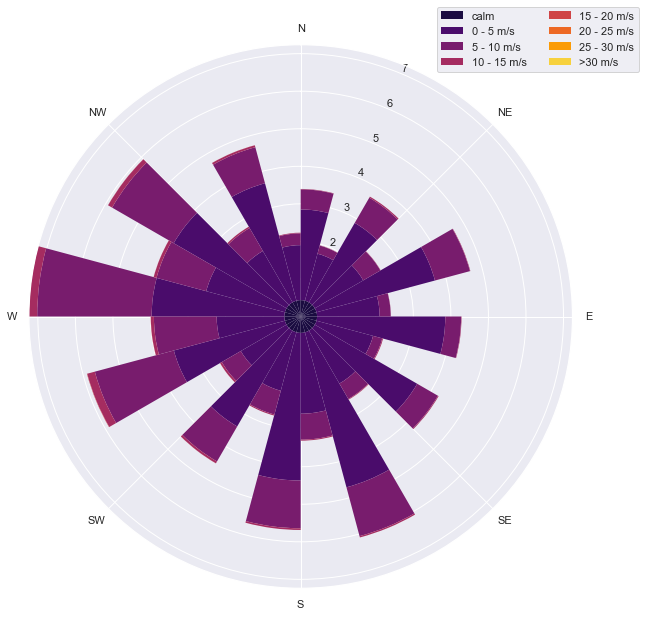

In [72]:
fig = wind_rose(rose, directions)

## Direccion de viento sobre test

In [73]:
calm_count = test[test['wind_speed'] == 0].shape[0]
total_count = len(test)
rose = (test.assign(WindSpd_bins=lambda df:
            pd.cut(df['wind_speed'], bins=spd_bins, labels=spd_labels, right=True)).assign(WindDir_bins=lambda df: pd.cut(df['wind_direction'], bins=dir_bins, labels=dir_labels, right=False)).replace({'WindDir_bins': {360: 0}}).groupby(by=['WindSpd_bins', 'WindDir_bins']).size().unstack(level='WindSpd_bins').fillna(0).assign(calm=lambda df: calm_count / df.shape[0]).sort_index(axis=1).applymap(lambda x: x / total_count * 100))

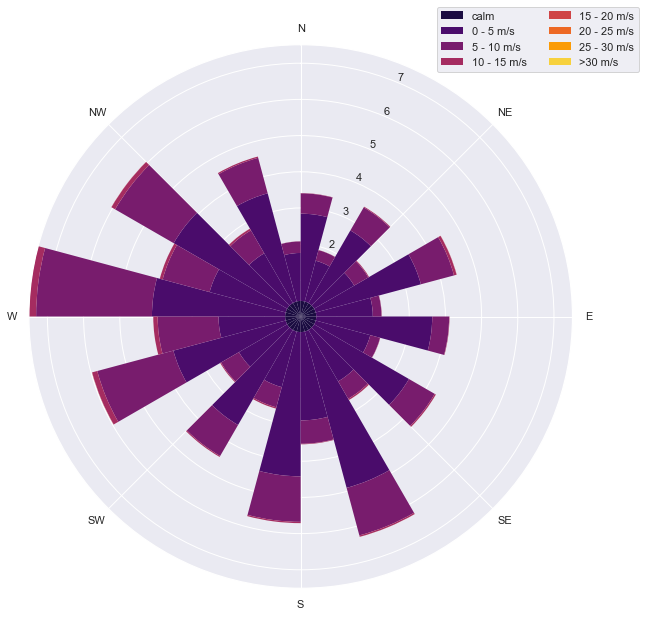

In [74]:
fig = wind_rose(rose, directions)

<a id="section_eng_feat"></a> 
## Feature engineering
[volver a TOC](#section_toc)

Vamos a agregar algunas características nuevas enfocadas a las series de tiempo

## Hora de la observacion

In [75]:
train['hour'] = train['timestamp'].dt.hour
test['hour'] = test['timestamp'].dt.hour

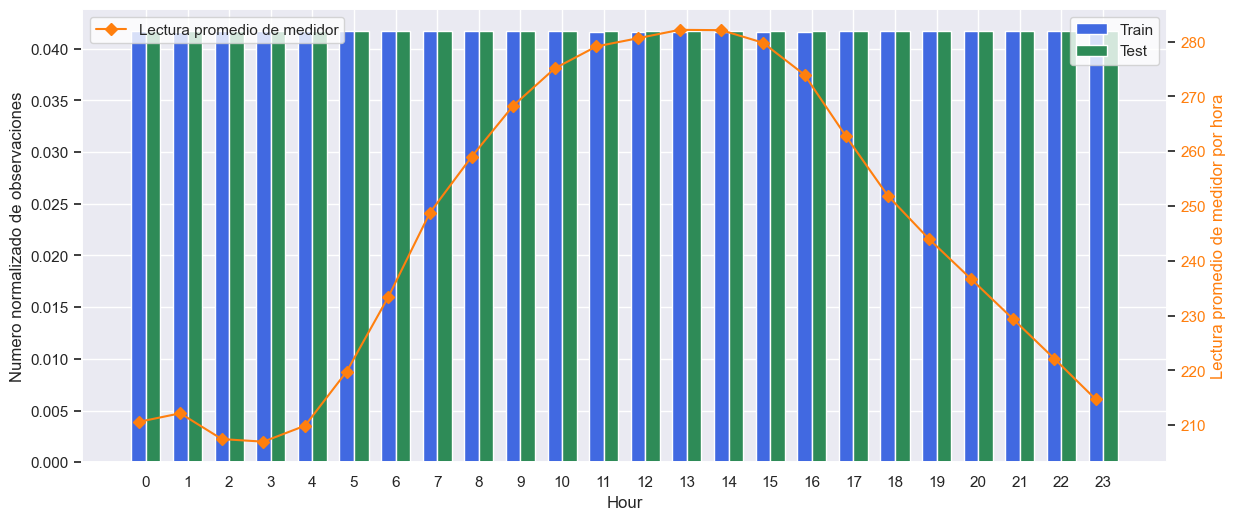

In [76]:
train_data = train['hour'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = test['hour'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Numero normalizado de observaciones');
axes.set_xlabel('Hour');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train['hour'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train[['hour', 'meter_reading']].groupby('hour')['meter_reading'].mean().sort_index().values, 'D-', color='tab:orange', label='Lectura promedio de medidor');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Lectura promedio de medidor por hora', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

## Observaciones dia del mes


In [77]:
train['day'] = train['timestamp'].dt.day
test['day'] = test['timestamp'].dt.day

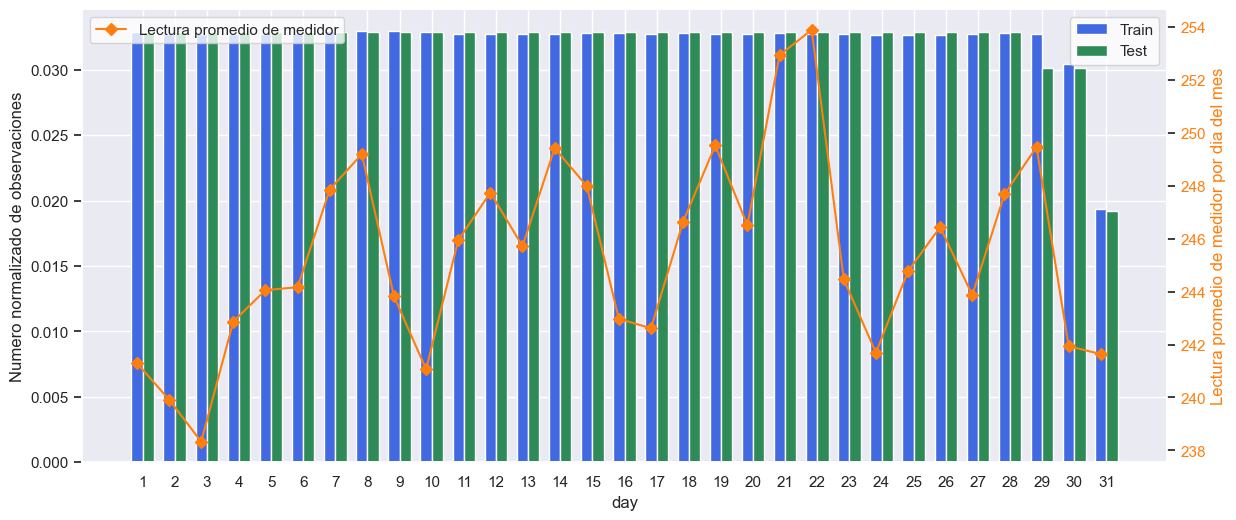

In [78]:
train_data = train['day'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = test['day'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Numero normalizado de observaciones');
axes.set_xlabel('day');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train['day'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train[['day', 'meter_reading']].groupby('day')['meter_reading'].mean().sort_index().values, 'D-', color='tab:orange', label='Lectura promedio de medidor');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Lectura promedio de medidor por dia del mes', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

## Observaciones dia de la semana

In [79]:
train['weekday'] = train['timestamp'].dt.weekday
test['weekday'] = test['timestamp'].dt.weekday

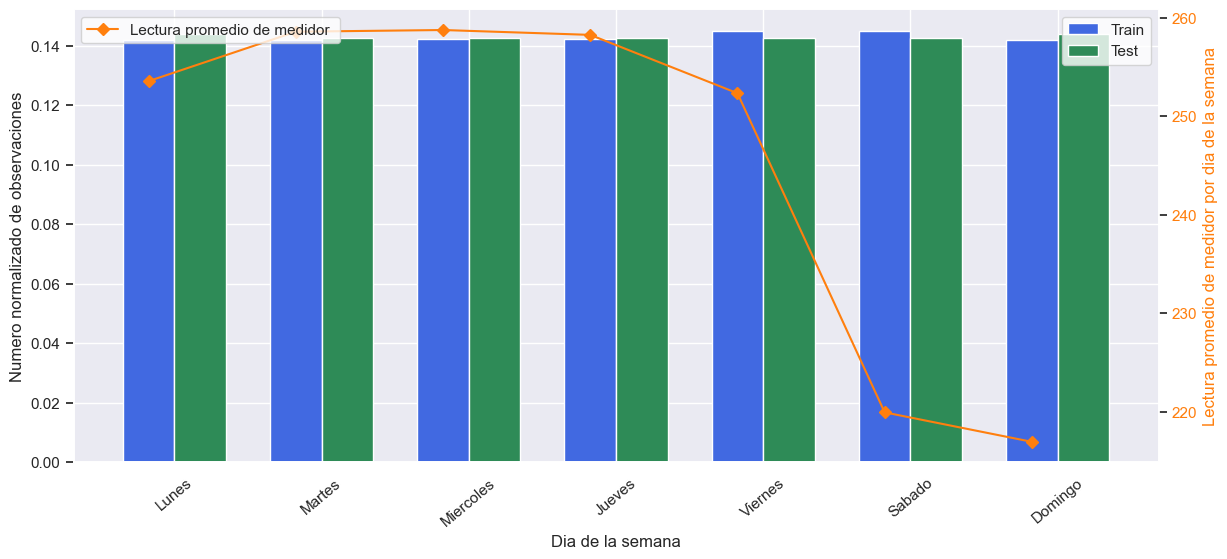

In [80]:
train_data = train['weekday'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = test['weekday'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Numero normalizado de observaciones');
axes.set_xlabel('Dia de la semana');
axes.set_xticks(ind + width / 2)
axes2 = axes.twinx()
mr = axes2.plot(ind, train[['weekday', 'meter_reading']].groupby('weekday')['meter_reading'].mean().sort_index().values, 'D-', color='tab:orange', label='Lectura promedio de medidor ');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Lectura promedio de medidor por dia de la semana', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

axes.set_xticklabels(train['weekday'].value_counts().sort_index().index.map({0: 'Lunes', 1: 'Martes', 2: 'Miercoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sabado', 6: 'Domingo'}), rotation=40);

In [81]:
# para manejar fechas
from datetime import datetime

current_year = datetime.now().year

# train
train['building_age'] = current_year - train.year_built
train.drop(columns=['year_built'], inplace=True)
# usamos fillna dado que tenemos NA en nuestra nueva columna
train.building_age.fillna(round(train.building_age.mean(),0),inplace=True)

# test
test['building_age'] = current_year - test.year_built
test.drop(columns=['year_built'], inplace=True)
# usamos fillna dado que tenemos NA en nuestra nueva columna
test.building_age.fillna(round(test.building_age.mean(),0),inplace=True)

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597256 entries, 0 to 20216096
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   floor_count         float16       
 8   air_temperature     float32       
 9   cloud_coverage      float16       
 10  dew_temperature     float32       
 11  precip_depth_1_hr   float16       
 12  sea_level_pressure  float32       
 13  wind_direction      float16       
 14  wind_speed          float32       
 15  hour                int64         
 16  day                 int64         
 17  weekday             int64         
 18  building_age        float32       
dtypes: category(1), datetime64[ns](1), float1

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9408240 entries, 0 to 41697596
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   row_id              int64         
 1   building_id         int16         
 2   meter               int8          
 3   timestamp           datetime64[ns]
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   floor_count         float16       
 8   air_temperature     float32       
 9   cloud_coverage      float16       
 10  dew_temperature     float32       
 11  precip_depth_1_hr   float16       
 12  sea_level_pressure  float32       
 13  wind_direction      float16       
 14  wind_speed          float32       
 15  hour                int64         
 16  day                 int64         
 17  weekday             int64         
 18  building_age        float32       
dtypes: category(1), datetime64[ns](1), float1

In [84]:
train.head()

building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  floor_count  air_temperature  cloud_coverage  dew_temperature  \
0         7432          NaN             25.0             6.0             20.0   
1         2720          NaN             25.0             6.0             20.0   
2         5376          NaN             25.0             6.0             20.0   
3        23685          NaN             25.0             6.0             20.0   
4       116607          NaN             25.0             6.0             20.0   

   precip_depth_1_hr  sea_level_pressure  wind_direction  wind_speed  hour  \
0                NaN         1019.700012             0.0         0.0     0   
1                NaN         1019.700012             0.0         0.0     0   
2                NaN         1019.700012             0.0         0.0     0   
3                NaN         1019.700012             0.0         0.0     0   
4                NaN         1019.700012             0.0         0.0     0   

   day  weekday  building_age  
0    1        4          13.0  
1    1        4          17.0  
2    1        4          30.0  
3    1        4          19.0  
4    1        4          46.0

<a id="section_no_out"></a> 
## DataSets sin outliers
[volver a TOC](#section_toc)

In [85]:
def convert_direction(degrees):
    if degrees <= 90:
        return 0
    elif degrees <= 180:
        return 1
    elif degrees <= 270:
        return 2
    elif degrees <= 360:
        return 3

train['wind_compass_direction'] = train.wind_direction.apply(convert_direction)
test['wind_compass_direction'] = test.wind_direction.apply(convert_direction)

train.drop(columns=['wind_direction'], inplace=True)
test.drop(columns=['wind_direction'], inplace=True)

In [86]:
train_orig = train 

In [87]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
    # compute IRQ
    iqr = q3 - q1
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return (lower_bound,upper_bound)

In [88]:
train_lower_bound, train_upper_bound = detect_outlier(train['meter_reading'])
#test_lower_bound, test_upper_bound = detect_outlier(test['meter_reading'])

In [89]:
print([train_lower_bound,train_upper_bound])

upper_bound_mask = train['meter_reading'] <= train_upper_bound
train_ub = train.loc[upper_bound_mask,:]

lower_bound_mask = train['meter_reading'] >= train_lower_bound
train_lb = train.loc[lower_bound_mask,:]

print(train_ub.shape[0])
print(train_lb.shape[0])

[-298.4488125, 579.0692875]
4160882
4597256


In [94]:
noZeros_mask = train['meter_reading'] > 0
train_noZeros_ub = train.loc[noZeros_mask & upper_bound_mask,:]

print(train_noZeros_ub.shape[0])

3980483


In [95]:
train.shape

(4597256, 19)

In [96]:
train_lb.site_id.value_counts()

3     788160
4     557399
9     552209
2     535446
5     430416
15    305382
0     258480
14    227347
13    201898
1     193248
12    175669
6     113899
10    109519
7     104784
11     43400
Name: site_id, dtype: int64

In [97]:
# nos quedamos con el nuevo dataset para train
train = train_noZeros_ub
train.shape

(3980483, 19)

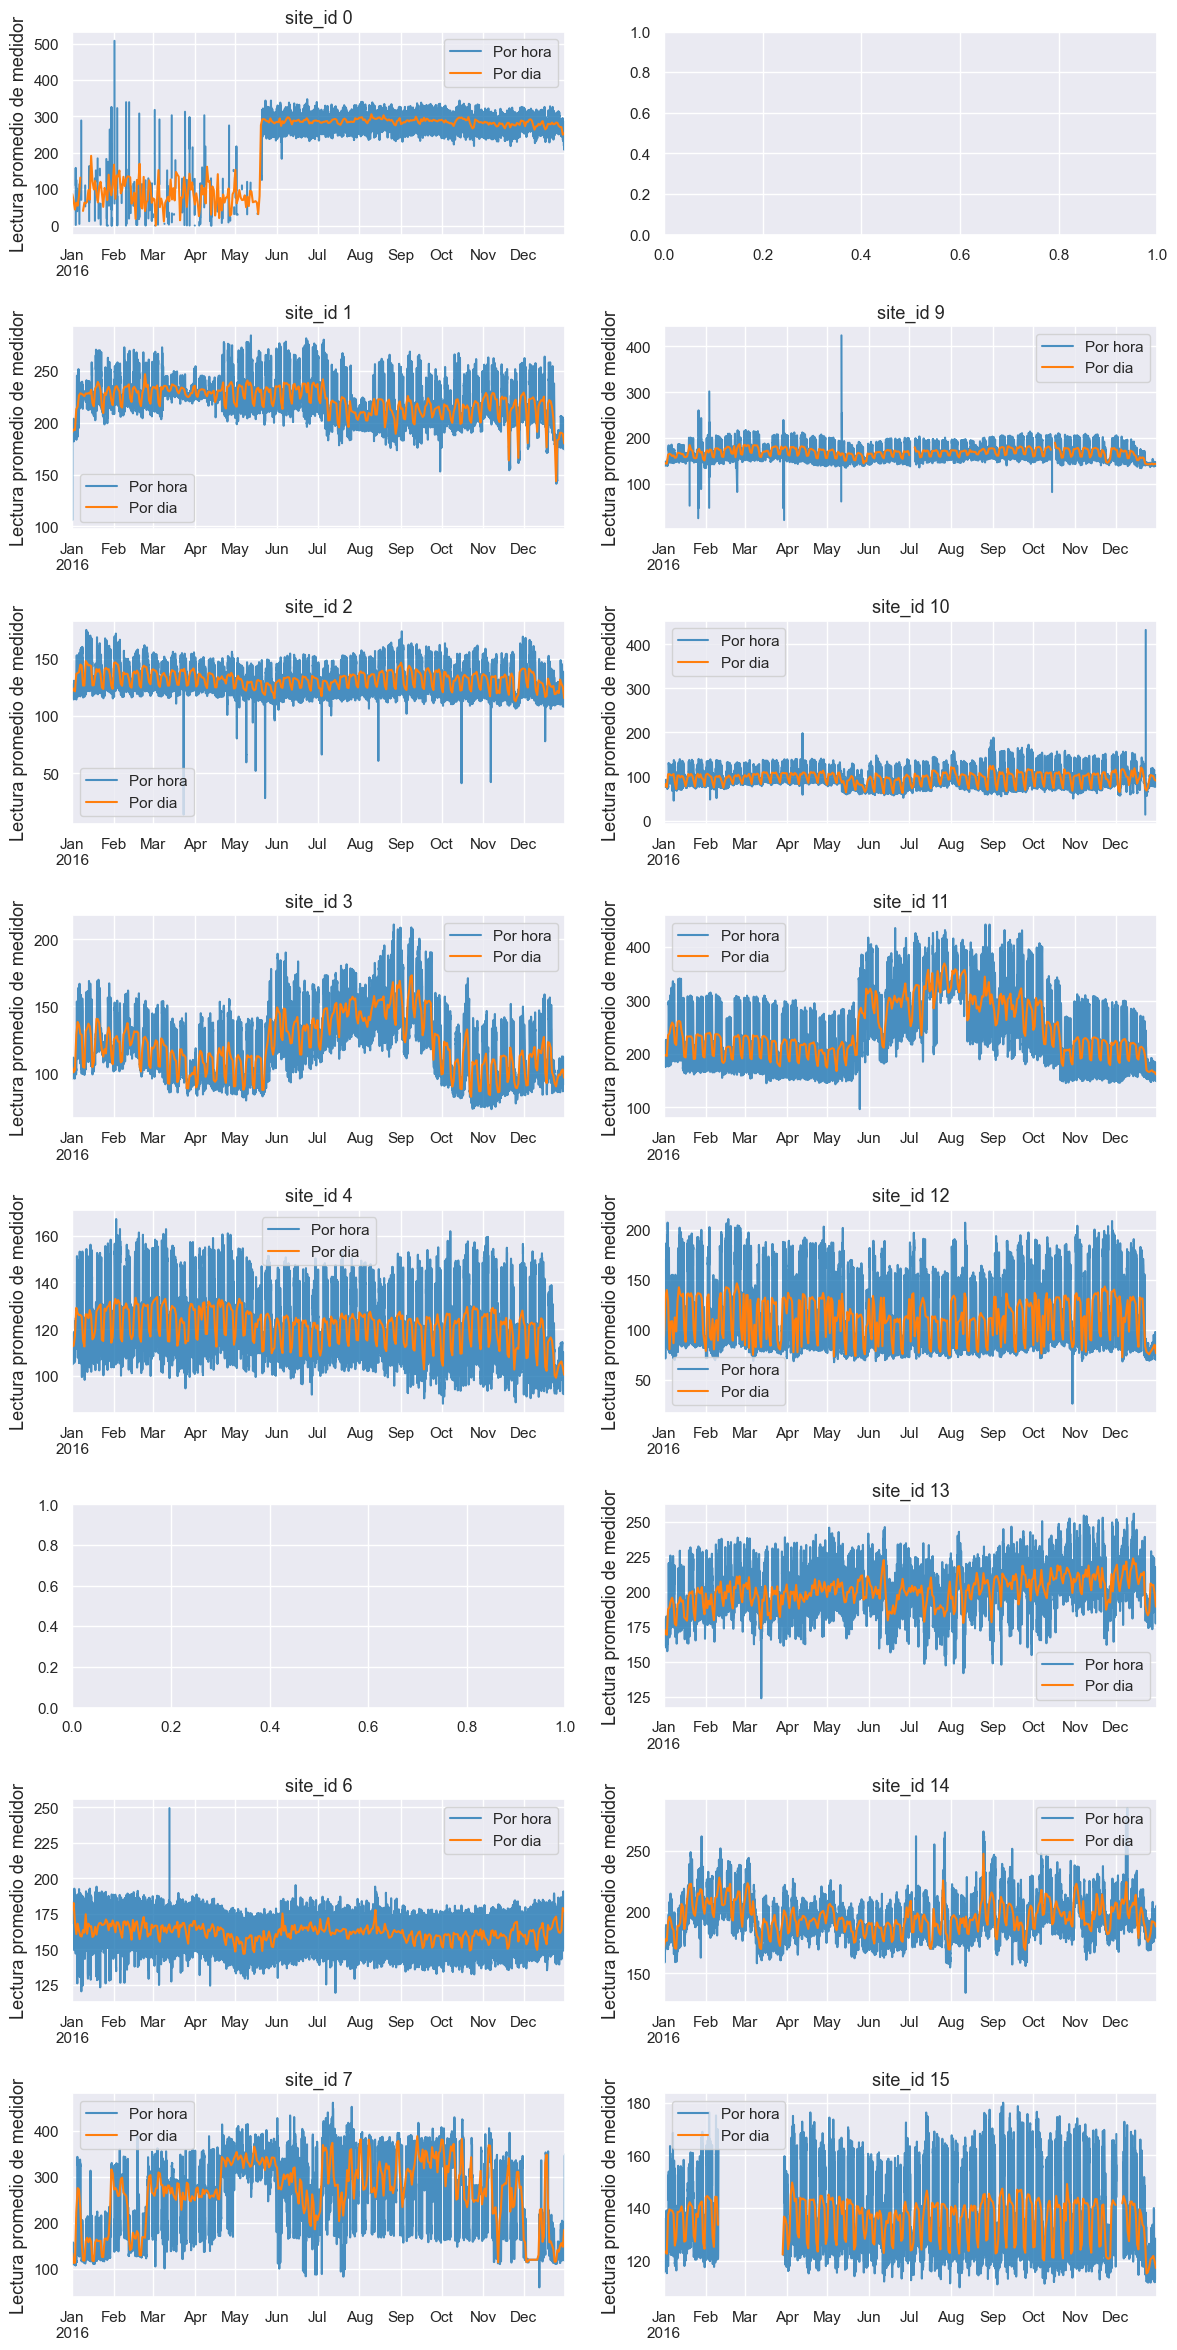

In [98]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(16):
    if i == 8 or i == 5:
        continue
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='Por hora', color='tab:blue').set_ylabel('Lectura promedio de medidor', fontsize=13);
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='Por dia', color='tab:orange').set_xlabel('');
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

## Generacion de .csv, train sin outliers, y test

In [99]:
train.to_csv('../Data/trainv2.csv') 

In [100]:
test.to_csv('../Data/testv2.csv') 

 
 
 
[volver a TOC](#section_toc)
